# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [ ]:
!python --version

Python 3.11.11


In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install scikit-learn==1.3.2 seaborn==0.13.1 matplotlib==3.8.0 numpy==1.25.2 pandas==2.2.2 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 3.6 MB/s eta 0:00:00


In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install scikit-learn==1.3.1 seaborn==0.13.1 matplotlib==3.8.0 numpy==1.25.2 pandas==2.2.2 imblearn==0.12.0 xgboost==2.0.3 -q --user
#!pip install --upgrade -q threadpoolctl

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To supress warnings
import warnings
warnings.filterwarnings("ignore")



## Loading the dataset

In [3]:
# uncomment the following lines if Google Colab is being used
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/Kamesh/BankChurners.csv')

## Data Overview

- Observations
- Sanity checks

**Top 5 rows of the data**

In [5]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


**Last 5 rows of the data**

In [6]:
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


**Understand the shape of the dataset**

In [7]:
df.shape

(10127, 21)

**Observations:**

*   Data set has a total of 10127 rows and 21 columns.




**Check the data types of the columns for the dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

**Observations:**

*   All columns except 6 are numerical columns. The other 6 are of the object data type
*   19 columns have no null values, 2 columns have null values
*   There are null values in the Education_Level and Marital_Status

**Check for duplicate values**

In [ ]:
df.duplicated().sum()

0

**Check for missing values**

In [ ]:
round(df.isnull().sum() / df.isnull().count() * 100, 2)

,0
CLIENTNUM,0.000
Attrition_Flag,0.000
Customer_Age,0.000
Gender,0.000
Dependent_count,0.000
Education_Level,15.000
Marital_Status,7.400
Income_Category,0.000
Card_Category,0.000
Months_on_book,0.000


**Observations:**

*   Education_Level has 15% missing values
*   Marital_Status has more than 7% missing values
*  These values will be imputed after splitting the data into training, validation, and test sets to avoid data leakage.




**Checking the Statistical Summary**

In [ ]:
# let's view the statistical summary of the numerical columns in the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


**Observations:**

*   **CLIENTNUM:** It is a unique identifier for customers and can be dropped as it wouldn't add any information to our analysis.
*   **Customer_Age:** It has a mean of 46 years, a min of 26, and a max of 73 years.
*   **Dependent_count:** On average the customers in the data have 2 dependents and a maximum of 5 dependents.
*   **Months_on_book:** has a mean of 35.9 months, a min of 13, and a max of 56 months.
*   **Total_Relationship_Count:** All customers use at least one product of the bank, whereas 75% of customers use 5 or fewer products of the bank and a max of 6 products with the bank.
*   **Months_Inactive_12_mon:** On average customers were inactive for two months and a min of 0, and a max of 6 months in the past 12 months.
*   **Contacts_Count_12_mon:** On average bank and customers interacted twice in the past 12 months.
*   **Credit_Limit:** Has a mean of 8632 dollars, a min of 1438, and a max of 34516 dollars. This is a very large range. Customers with high credit limit might be outliers.
*   **Total_Revolving_Bal:** Average revolving balance of customers is 1162, there's not much difference in the third quartile and maximum value.
*  **Avg_Open_To_Buy:** Average amount that goes unused by the customers is 7469, the range is very wide for this variable and the extreme values(min and max) might be outliers.
*   **Total_Amt_Chng_Q4_Q1:** For 75% of the customers the transaction amount in Q4 was less than the transaction amount in Q1.
*   **Total_Trans_Amt:** Average transaction amount of last 12 months is 4404, a min of 510, and a max of 18484 dollars.
*   **Total_Trans_Ct:** On average customers made 64 or fewer transactions, a min of 10, and a max of 139 total transactions. While 75% of the customers made 81 transactions
*  **Total_Ct_Chng_Q4_Q1:** For 75% of the customers the number of transactions in Q4 was less than the transactions made in Q1. It has a mean 0.71, a min of 0, and a max of 3.71.
*  **Avg_Utilization_Ratio:** On average customers used around 27% of the available credit amount of their card, with 75% of the customers utilizing 50% or less of their available credit amount. It has a mean of 27.5%, a min of 0%, and a max of 99.9%.

In [ ]:
# Statistical summary of the columns with data type of "object".
df.describe(include=["object"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


**Observations:**

* **Attrition_Flag** has 10127 non-null entries and 2 unique entries, with the most frequent being "Existing Customer".
* **Gender** has 10127 non-null entries and 2 unique entries, with the most frequent being "F".
* **Education_Level** has 8608 non-null entries and 6 unique entries, with the most frequent being "Graduate". Null values are present and will be imputed after data is split into training, validation, and test sets to avoid data leakage.
* **Marital_Status** has 9369 non-null entries and 3 unique entries, with the most frequent being "Married". Null values are present and will be imputed after data is split into training, validation, and test sets to avoid data leakage.
* **Income_Category** has 10127 non-null entries and 6 unique entries, with the most frequent being "Less than 40k"
* **Card_Category** has 10127 non-null entries and 4 unique entries, with the most frequent being "Blue".


**Checking the unique categories in each categorical variable**

In [ ]:
for i in df.describe(include=["object"]).columns:
  print("Unique values in", i, "are :")
  print(df[i].value_counts())
  print("*" * 50)

Unique values in Attrition_Flag are :
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
F    5358
M    4769
Name: count, dtype: int64
**************************************************
Unique values in Education_Level are :
Education_Level
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
**************************************************
Unique values in Marital_Status are :
Marital_Status
Married     4687
Single      3943
Divorced     748
Name: count, dtype: int64
**************************************************
Unique values in Income_Category are :
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: count, dtype: int64
********************

**Observations:**

* Most of the records are for existing customers.
* Most of the bank's customers are female
* Most customers are graduates.
* Most customers are married.
* Most customers lie in the income group of less than $40k
* Most customers have a blue card.
* The data is imbalanced

**Missing values**

* 'abc' value of Income_Category can be considered and treated as missing values.

**Data Pre-processing**


In [ ]:
# CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling
df.drop(["CLIENTNUM"], axis=1, inplace=True)

In [ ]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
df["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
df["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



**Answers:**

1. The Total_Trans_Amt is right skewed, with a median of about 4000.

==================================================================================================================

2. The distribution of Education_Level:
    Graduate degree - 36%
    High school diploma - 23%
    Uneducated - 17%
    Bachelor's - 11.8%
    Post-Graduate - 6%
    Doctorate - 5.2%

==================================================================================================================

3. The distribution of Income_Level:
    Less than 40K - 35.2%
    40k - 60k - 17.7%
    80k - 120k - 15%
    60k - 80k - 13.8%
    120k+ - 7.2%


==================================================================================================================

4. Total_Ct_Chng_Q4_Q1 is much lower for attrited customers compared to existing customers. Attrited customers have a median of about 50 whereas existing customers have a median of closer to 70. The ratio of Q4 transaction counts to Q1 transaction counts (Q4/Q1) is much higher for existing customers indicating that attrited customers are spending less at the end of the year than existing customers.

==================================================================================================================

5. Months_Inactice_12_mon does have some affect on attrition, but a clear pattern is not obvious. Customers with 0 months inactive have about a 50-50 chance of being attrited, but all other values are much less likely to attrition.

==================================================================================================================

6. Attributes with a strong correlation:
* Avg_Open_to_Buy and Credit_Limit are completely positively correlated by necessity. As a customer's credit limit goes up, their open to buy also increases.
* Total_Trans_Amt and Total_Trans_Ct are very highly positively correlated. This makes sense because the more transations a customer makes, the more the customer will spend.
* Customer_Age and Months_on_book are highly positively correlated. This makes sense because as customers age, their time with the bank increases.
Total_Revolving balance and Avg_Utilization_Ratio is positively correlated.
* This makes sense because if a customer has a high utilization, they will likely have a higher revolving balance.
* Avg_Open_To_Buy and Avg_Utilization_Ratio are negatively correlated. This is because the higher a customers utilization is, the less their amount open to buy will be.
* Credit_Limit and Avg_Utilization_Ratio are negatively correlated. This is because customers with a higher credit limit tend to have a lower utilization.

==================================================================================================================

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

**Univariate Analysis**


**Observations on Customer_Age**


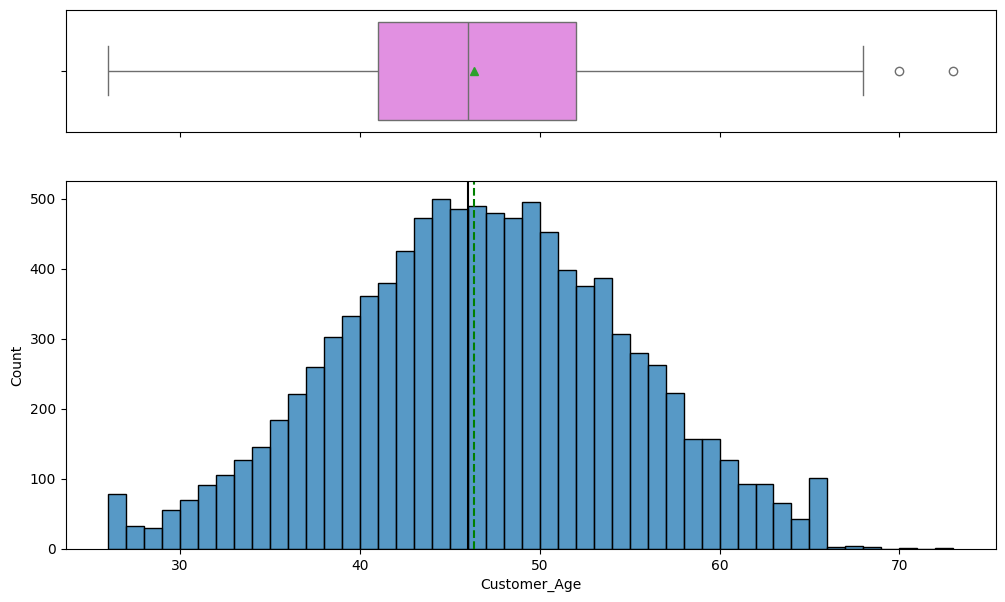

In [ ]:
histogram_boxplot(df, 'Customer_Age')

**Observations:**

* The distribution of Customer_Age is normally distributed with median at 46 years.
* From the boxplot, we can see that there are a few outliers.

**Observations on Months_on_book**


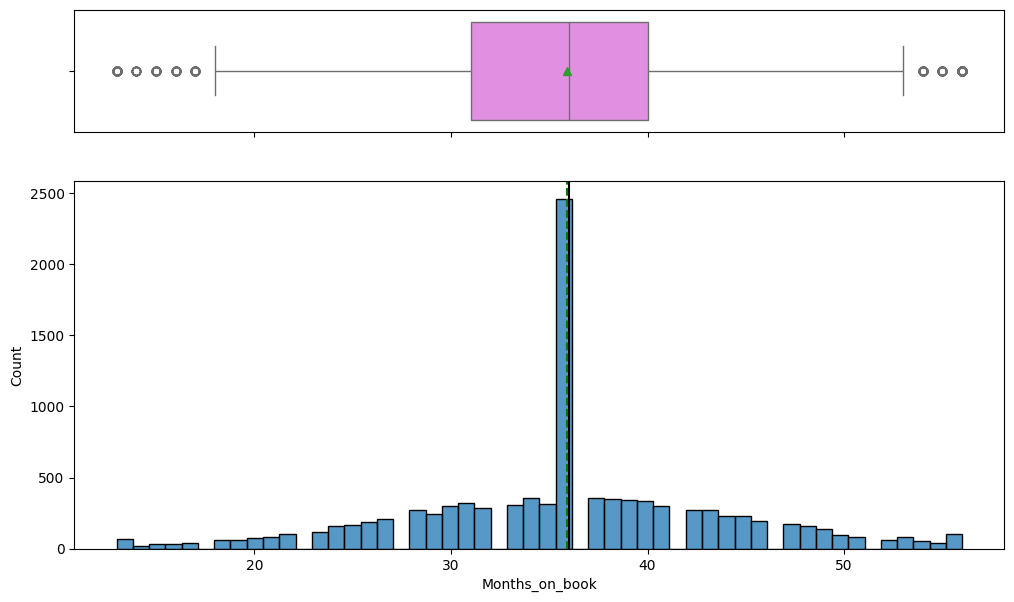

In [ ]:
histogram_boxplot(df, 'Months_on_book')

In [ ]:
df['Months_on_book'].value_counts(1).head(1)

,proportion
Months_on_book,
36,0.243


**Observations:**

* Months_on_book is normally distributed with a very high frequency of the mode.
* 24% of the entries have 36 Months_on_book.
* From the boxplot, we can see that there are outliers on both sides of the whiskers.

**Observations on Credit_Limit**


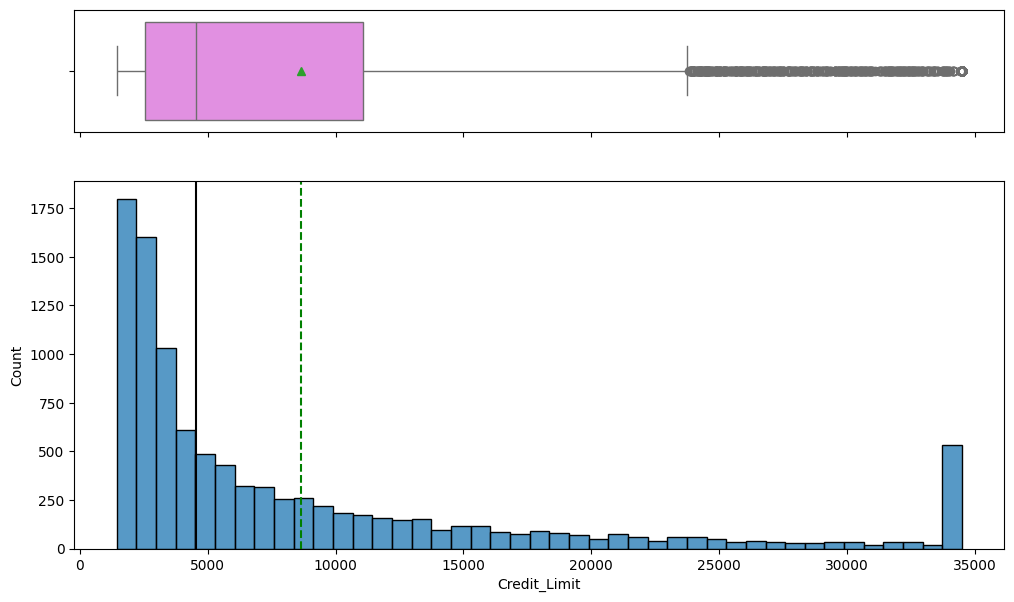

In [ ]:
histogram_boxplot(df, 'Credit_Limit')

**Observations:**

* The distribution of the Credit_Limit is skewed to the right.
* There are quite a few customers with a maximum Credit Limit of 35000.
* 50% of the customers of the bank have a credit limit of less than <5000.

**Observations on Total_Revolving_Bal**


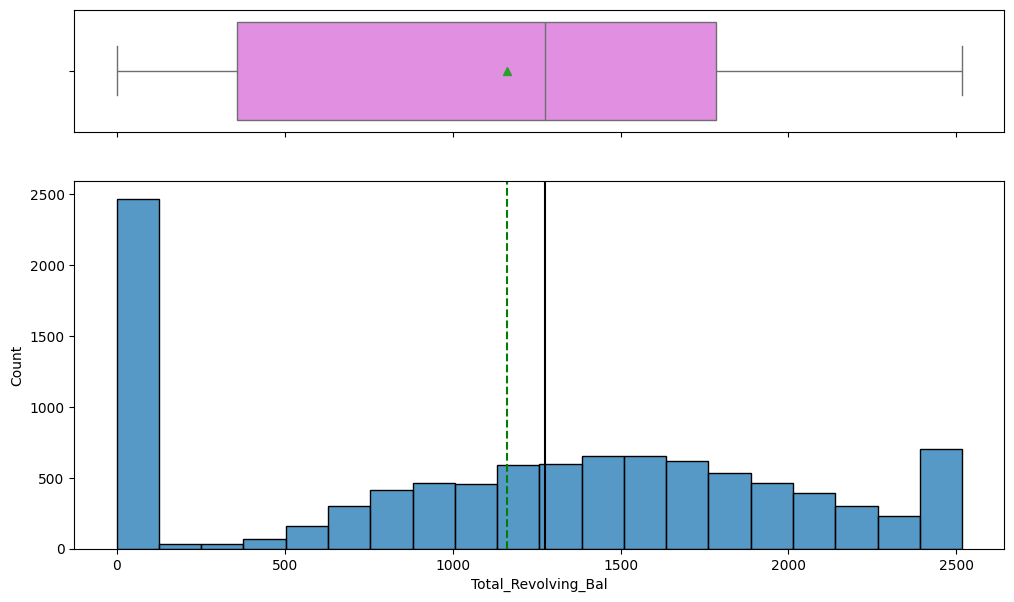

In [ ]:
histogram_boxplot(df, 'Total_Revolving_Bal')

**Observations:**
* Most customers pay the complete dues of credit card and have 0 revolving balance.
* There are quite a few customers with a revolving balance of 2500.
* Median Total_Revolving_bal is around 1250 with the mean being slightly lower.


**Observations on Avg_Open_To_Buy**

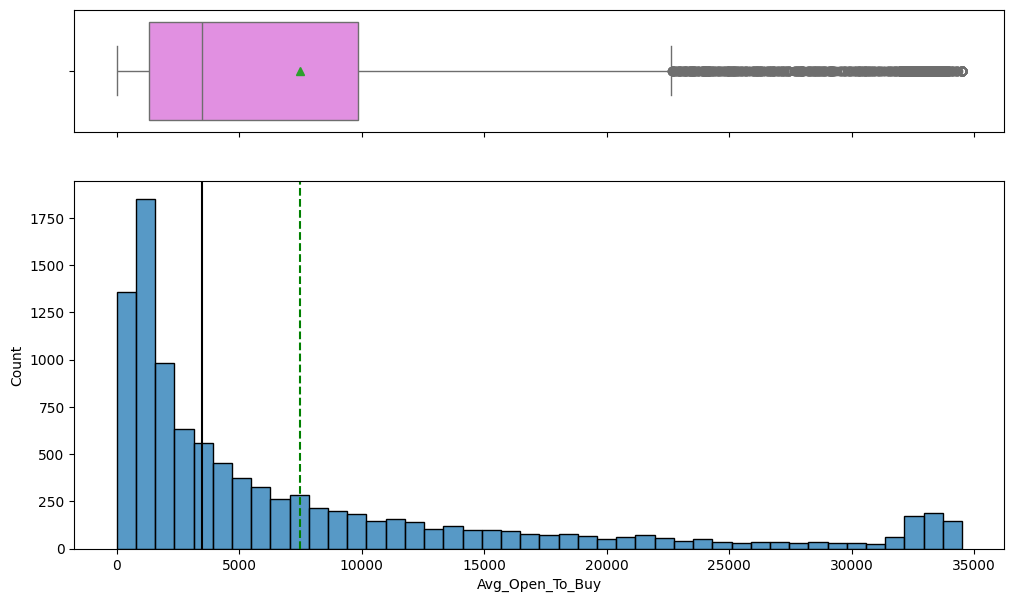

In [ ]:
histogram_boxplot(df, 'Avg_Open_To_Buy')

**Observations:**

* The distribution of the Avg_Open_To_Buy column is right-skewed as indicated by the mean being so much greater than the median.
* Avg_Open_To_Buy has a range of nearly 35,000.
* Avg_Open_To_Buy has so many outliers it seems that they cant possibly be all outliers.

**Observations on Total_Amt_Chng_Q4_Q1**


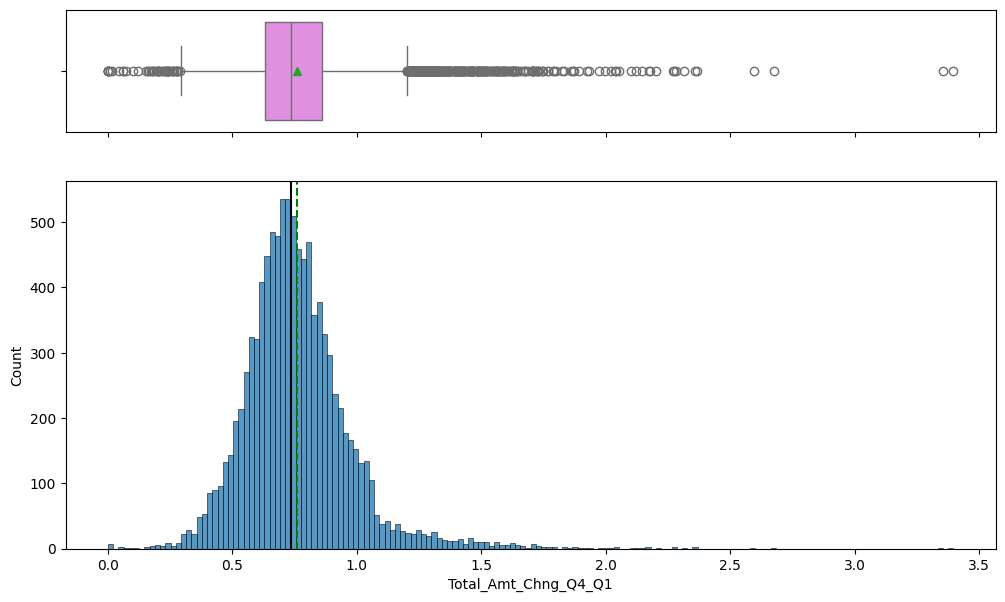

In [ ]:
histogram_boxplot(df, 'Total_Amt_Chng_Q4_Q1')

**Observations:**

*   Total_Amt_Chng_Q4_Q1 is normally distributed with many outliers and centered around 0.6.
*   From the boxplot, we can see that there are outliers on both sides of the whiskers.

**Observations on Total_Trans_Amt**


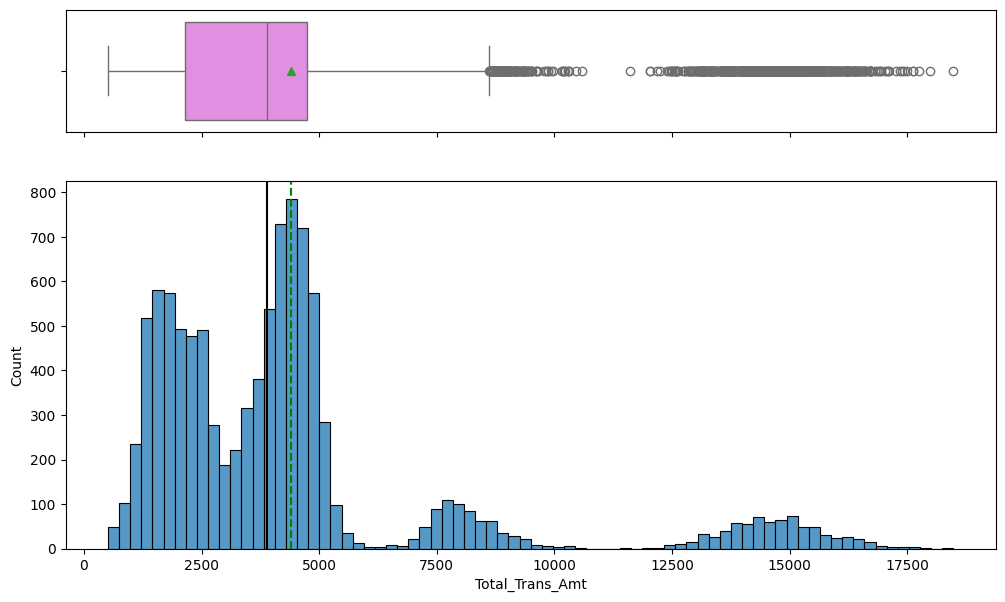

In [ ]:
histogram_boxplot(df, 'Total_Trans_Amt')

**Observations:**

*  The distribution of Total_Trans_Amt is skewed to the right.
*  Total_Trans_Amt is right skewed with many outliers. It has a median of about 4000.


**Observations on Total_Trans_Ct**


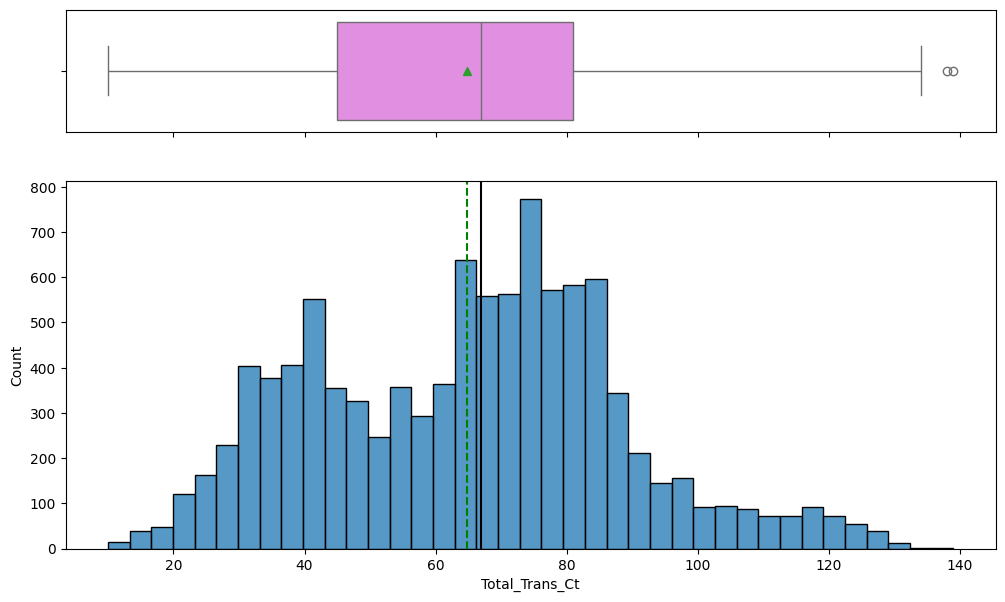

In [ ]:
histogram_boxplot(df, 'Total_Trans_Ct')

**Observations:**

*   Total_Trans_Ct is pretty normally distributed with almost a median equal to the mean.
*   The distribution of Total_Trans_Ct shows two peaks on 40 and 80 transactions in a year which indicates that customers used credit cards 3 to 6 times a month to make transactions.

**Observations on Total_Ct_Chng_Q4_Q1**


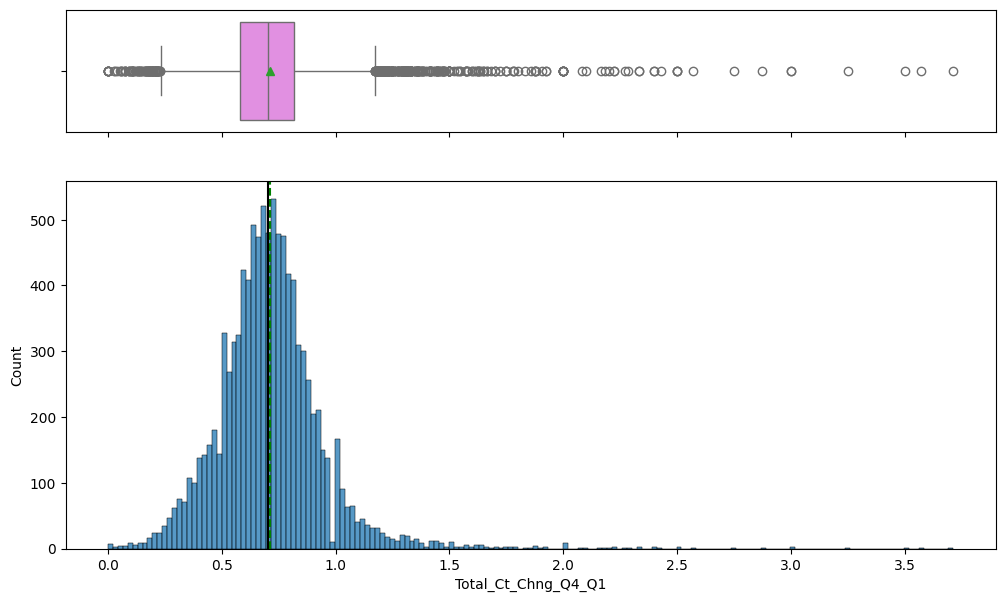

In [ ]:
histogram_boxplot(df, 'Total_Ct_Chng_Q4_Q1')

**Observations:**

*   Total_Ct_Chng_Q4_Q1 is normally distributed and centered around 0.6.
*   From the boxplot, we can see that there are outliers on both sides of the whiskers.

**Observations on Avg_Utilization_Ratio**


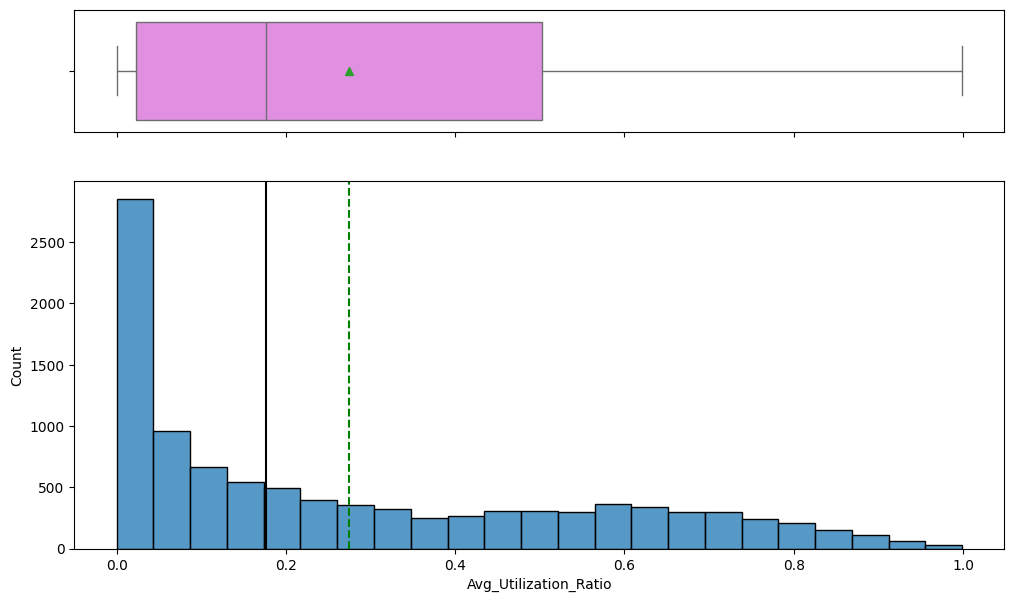

In [ ]:
histogram_boxplot(df, 'Avg_Utilization_Ratio')

**Observations:**

*   The distribution of Avg_Utilization_Ratio is skewed to the right.
*   This distribution is not a positive sign for the bank as most of the customers are not utilizing their credit amount.

**Observations on Dependent_count**


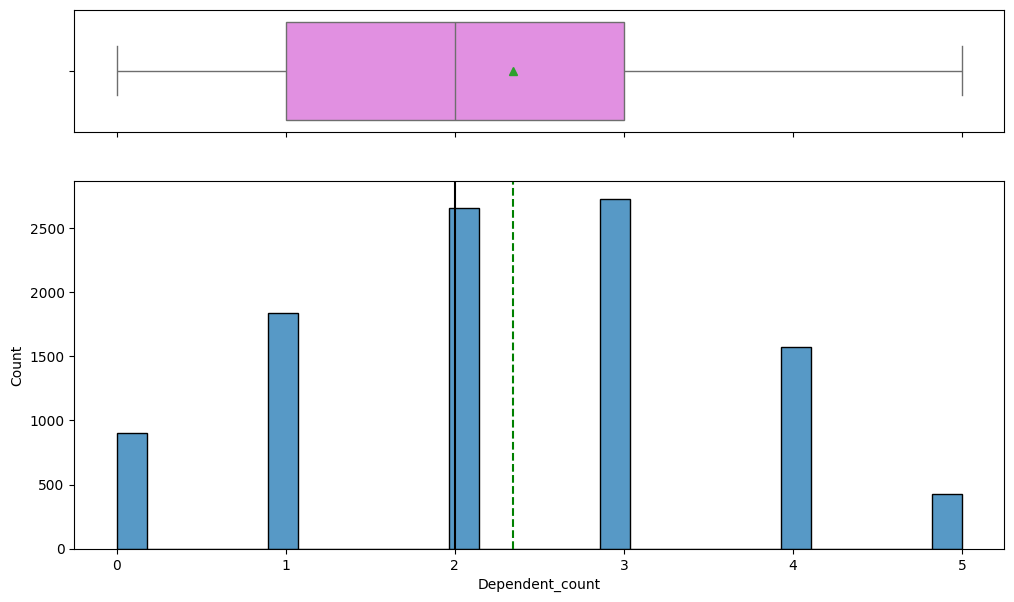

In [ ]:
histogram_boxplot(df, 'Dependent_count')

**Observations on Attrition_Flag**


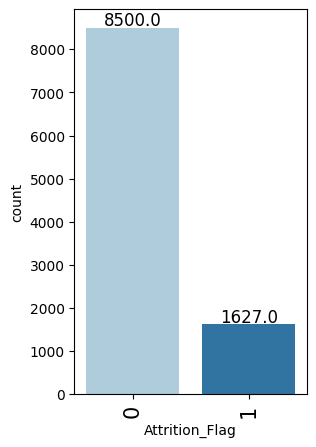

In [ ]:
labeled_barplot(df, 'Attrition_Flag')

In [ ]:
# Getting percentages of values
df['Attrition_Flag'].value_counts(1)

,proportion
Attrition_Flag,
0,0.839
1,0.161


**Observations:**

* 16.1% of the customers attrited.
* This indicates an imbalance in the data.

**Observations on Gender**


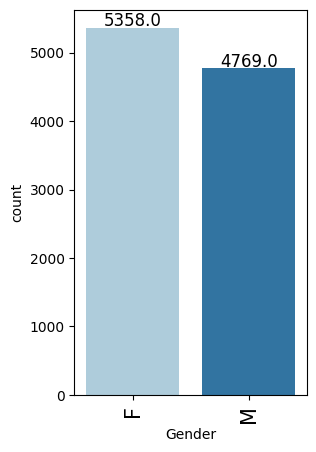

In [ ]:
labeled_barplot(df, 'Gender')

In [ ]:
df['Gender'].value_counts(1)

,proportion
Gender,
F,0.529
M,0.471


**Observations:**

*   We have 52.9% of customers are femalewhich is little bit more than Male customers.

**Observations on Dependent_count**


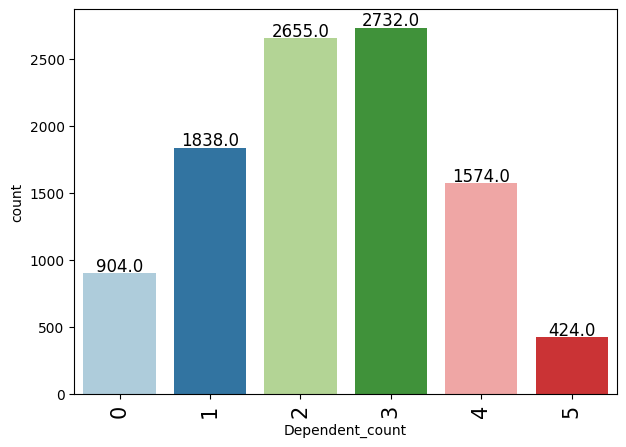

In [ ]:
labeled_barplot(df, 'Dependent_count')

In [ ]:
# Getting percentages of values
df['Dependent_count'].value_counts(1)

,proportion
Dependent_count,
3,0.270
2,0.262
1,0.181
4,0.155
0,0.089
5,0.042


**Observations:**

* 26.9% of customers have 3 dependents.
* 26.2% of customers have 2 dependents.
* 18% of customers have 1 dependent.
* 15% of customers have 4 dependents.

**Observations on Education_Level**


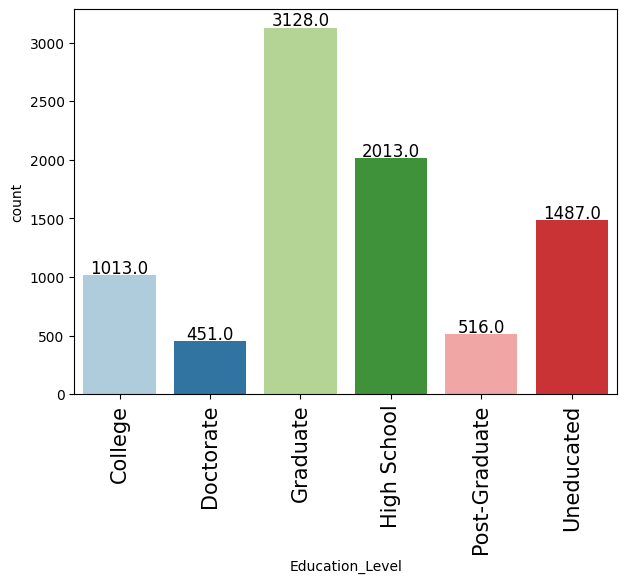

In [ ]:
labeled_barplot(df, 'Education_Level')

In [ ]:
# Getting percentages of values
df['Education_Level'].value_counts(1)

,proportion
Education_Level,
Graduate,0.363
High School,0.234
Uneducated,0.173
College,0.118
Post-Graduate,0.060
Doctorate,0.052


**Observations:**

* 36% of customers have a graduate degree.
* 23% of customers have a high school diploma.
* 17% of customers are uneducated.

**Observations on Marital_Status**


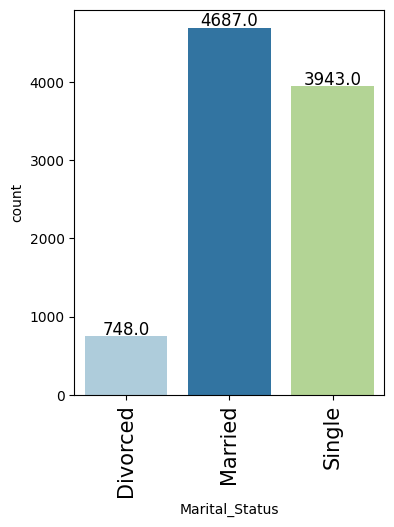

In [ ]:
labeled_barplot(df, 'Marital_Status')

In [ ]:
# Getting percentages of values
df['Marital_Status'].value_counts(1)

,proportion
Marital_Status,
Married,0.500
Single,0.420
Divorced,0.080


**Observations:**

* 50% of customers are married.
* 42% of customers are single.
* 8% of customers are divorced.



**Observations on Income_Category**


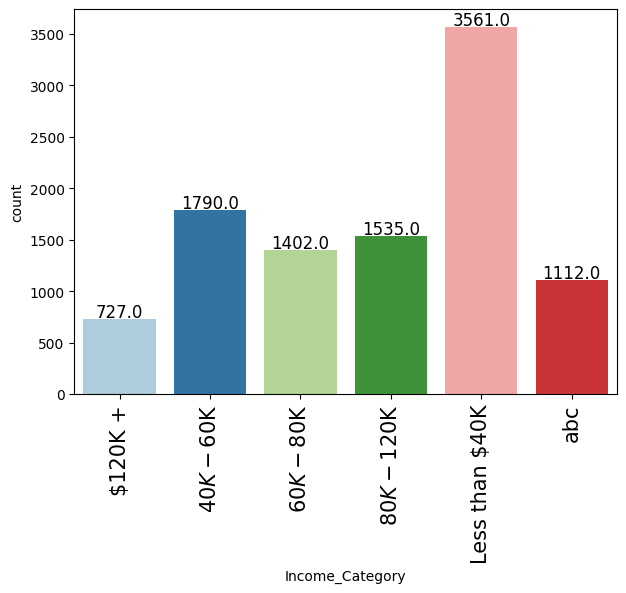

In [ ]:
labeled_barplot(df, 'Income_Category')

In [ ]:
# Getting percentages of values
df['Income_Category'].value_counts(1)

,proportion
Income_Category,
Less than $40K,0.352
$40K - $60K,0.177
$80K - $120K,0.152
$60K - $80K,0.138
abc,0.110
$120K +,0.072


**Observations:**

* 39% of customers make less than 40k.
* 17% of customers make between 40k - 60k.
* 15% of customers make between 80k - 120k.



**Observations on Card_Category**


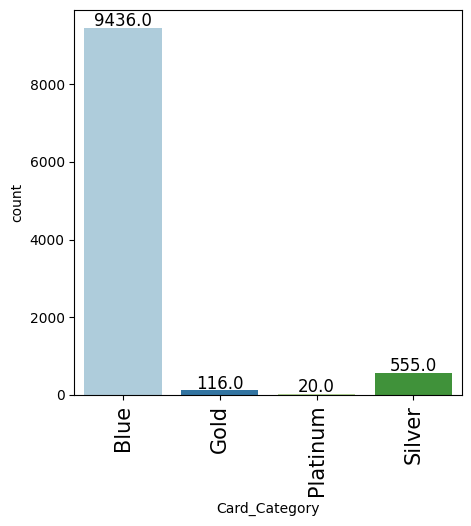

In [ ]:
labeled_barplot(df, 'Card_Category')

In [ ]:
# Getting percentages of values
df['Card_Category'].value_counts(1)

,proportion
Card_Category,
Blue,0.932
Silver,0.055
Gold,0.011
Platinum,0.002


**Observations:**

*  93% of customers have a Blue card.
* 5% of customers have a Silver card.



**Observations on Total_Relationship_Count**


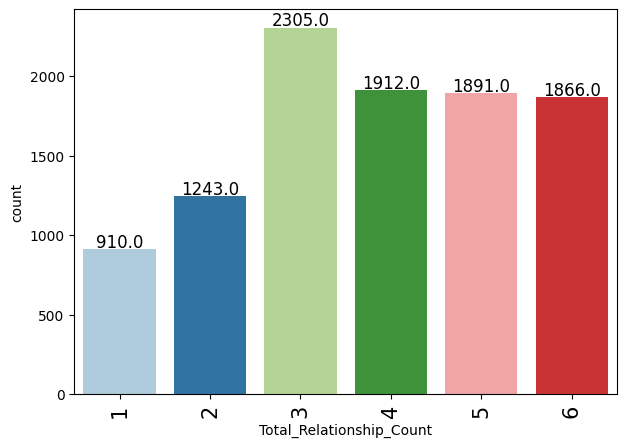

In [ ]:
labeled_barplot(df, 'Total_Relationship_Count')

In [ ]:
# Getting percentages of values
df['Total_Relationship_Count'].value_counts(1)

,proportion
Total_Relationship_Count,
3,0.228
4,0.189
5,0.187
6,0.184
2,0.123
1,0.090


**Observations:**

* 22.8% of customers have 3 products.
* 18.9% of customers have 4 products.
* 18.7% of customers have 5 products.
* 18.4% of customers have 6 products.

**Observations on Months_Inactive_12_mon**


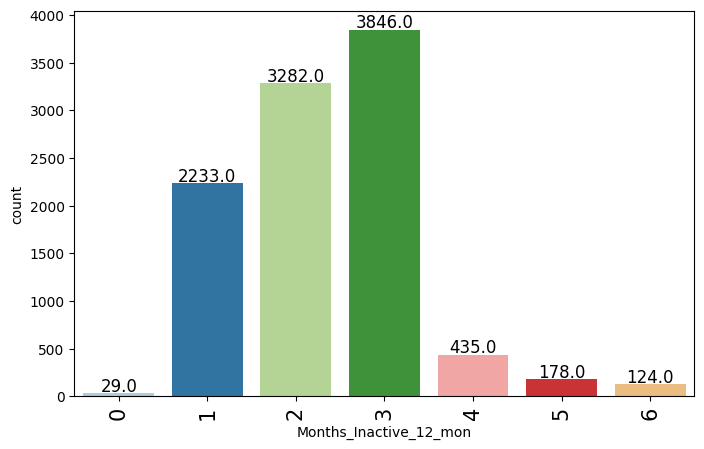

In [ ]:
labeled_barplot(df, 'Months_Inactive_12_mon')

In [ ]:
# Getting percentages of values
df['Months_Inactive_12_mon'].value_counts(1)

,proportion
Months_Inactive_12_mon,
3,0.380
2,0.324
1,0.220
4,0.043
5,0.018
6,0.012
0,0.003


**Observations:**

* 38% of customers have 3 months inactive.
* 32% of customers have 2 months inactive.
* 22% of customers have 1 months inactive.


**Observations on Contacts_Count_12_mon**


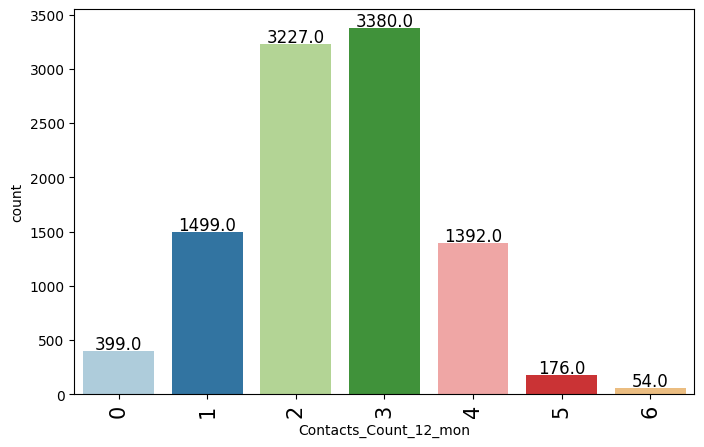

In [ ]:
labeled_barplot(df, 'Contacts_Count_12_mon')

In [ ]:
# Getting percentages of values
df['Contacts_Count_12_mon'].value_counts(1)

,proportion
Contacts_Count_12_mon,
3,0.334
2,0.319
1,0.148
4,0.137
0,0.039
5,0.017
6,0.005


**Observations:**

* 33% of customers have been contacted 3 times in the last 12 months.
* 31% of customers have been contacted 3 times in the last 12 months.
* 14% of customers have been contacted 1 times in the last 12 months.

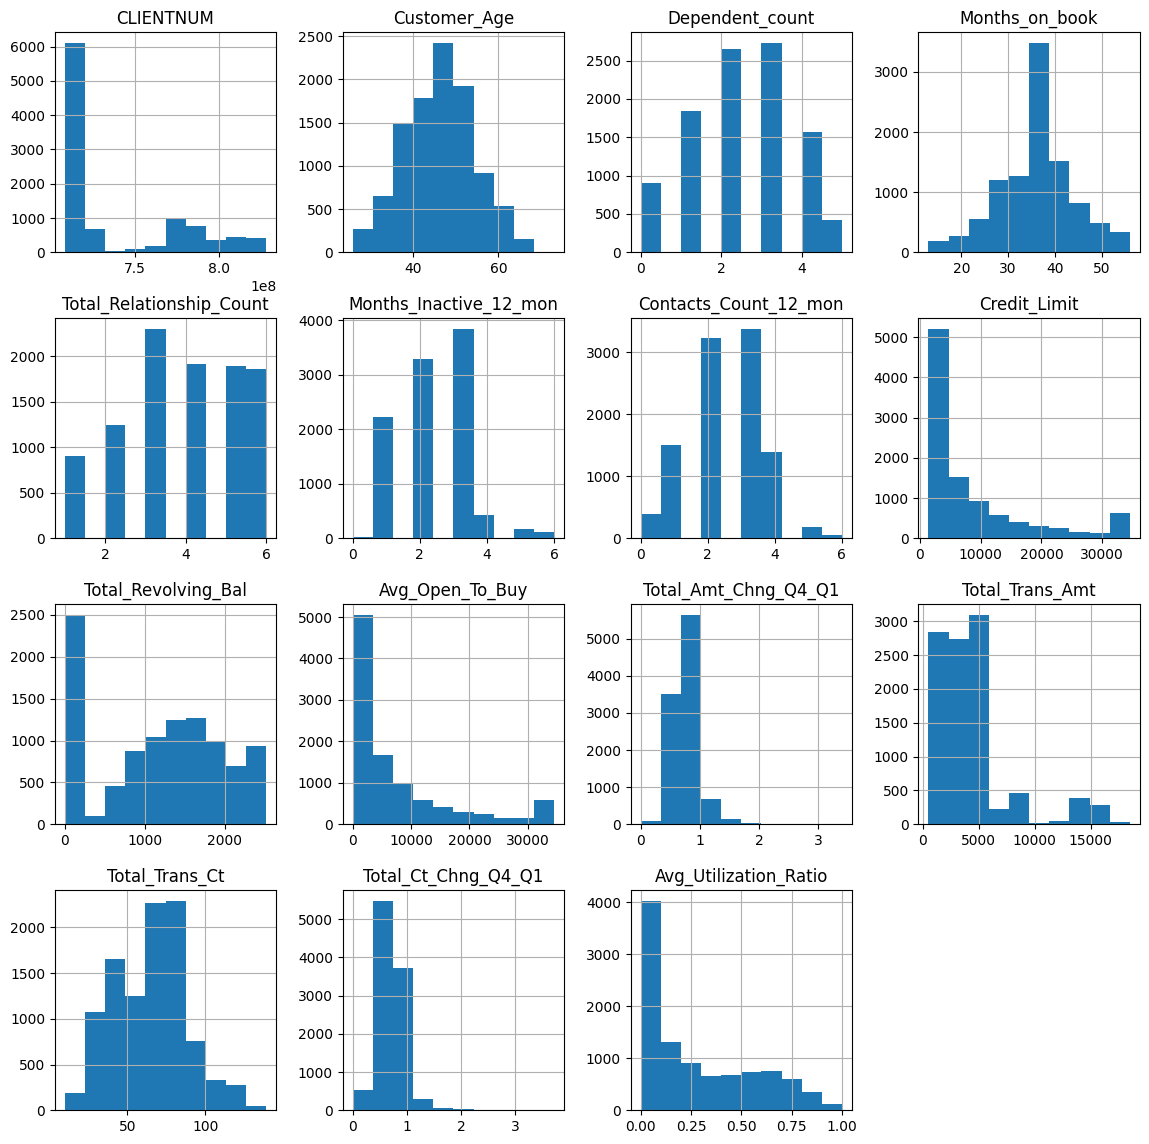

In [ ]:
# creating histograms
df.hist(figsize=(14, 14))
plt.show()

**Observations:**

* **Customer_Age:** The distribution of Customer_Age is normally distributed with mean and median at 46 years.
* **Dependent_count:** Most customers are having 2 or 3 dependents.
* **Months_on_book:** Most customers are with the bank for 3 years.
* **Total_Relationship_Count:** Equal percentage of customers using 4,5 and 6 products might suggest that customers who opt or buy the 4th product will also be ready to buy more products.
* **Months_Inactive_12_mon:** Very few customers were inactive for more than 3 months.
* **Contacts_Count_12_mon:** Most of the customers interacted with the bank less than 4 times in the past 12 months.
* **Credit_Limit:** The distribution of the Credit_Limit is skewed to the right. There are quite a few customers with a maximum Credit Limit of 35000. 50% of the customers of the bank have a credit limit of less than <5000.
* **Total_Revolving_Bal:** Most customers pay the complete dues of credit card and have 0 revolving balance.
* **Avg_Open_To_Buy:** The distribution of the Avg_Open_To_Buy column is right-skewed. A right-skewed distribution indicates that most customers used a big part of their limit while only a few customers (on the right tail) were left with a majority of their credit amount.
* **Total_Amt_Chng_Q4_Q1:** The distribution of Total_Amt_Chng_Q4_Q1 looks normally distributed but there's a slight skew towards the right.
* **Total_Trans_Amt:** The distribution of Total_Trans_Amt is skewed to the right. There are two peaks in data at total transaction amounts of one around 2500 and the second around the mean value of ~4500.
* **Total_Trans_Ct:** The distribution of Total_Trans_Ct shows two peaks on 40 and 80 transactions in a year which indicates that customers used credit cards 3 to 6 times a month to make transactions.
* **Total_Ct_Chng_Q4_Q1:** The distribution of Total_Ct_Chng_Q4_Q1 looks normally distributed but there's a slight skew towards the right.
* **Avg_Utilization_Ratio:** The distribution of Avg_Utilization_Ratio is skewed to the right. This distribution is not a positive sign for the bank as most of the customers are not utilizing their credit amount.

**Bivariate Analysis**

**Correlation Check**



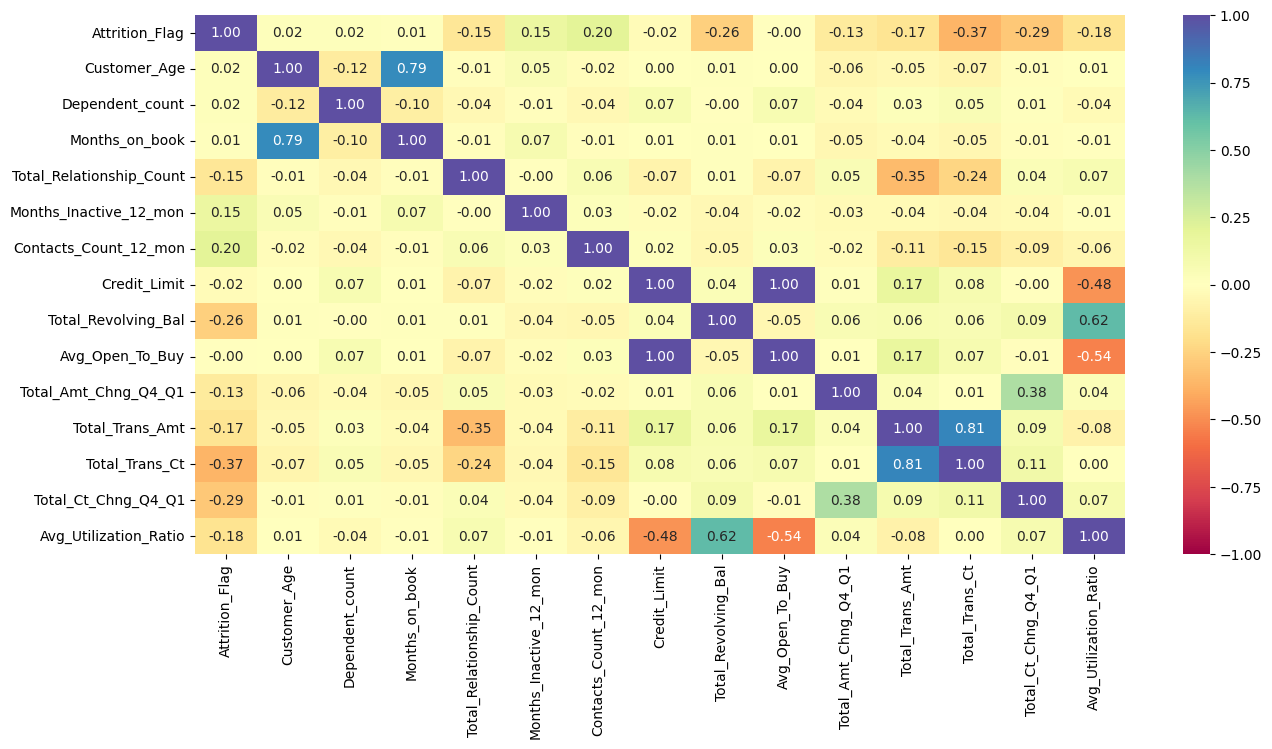

In [ ]:
# Filter numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Plot heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(numeric_df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations:**
* Attrition_Flag shows a bit of a negative correlation with Total_Trans_Ct (total transactions) and Total_Trans_Amt (total transaction amount).
* Avg_Open_to_Buy and Credit_Limit are completely positively correlated by necessity. As a customer's credit limit goes up, their open to buy also increases.
* Total_Trans_Amt and Total_Trans_Ct are very highly positively correlated. This makes sense because the more transations a customer makes, the more the customer will spend.
* Customer_Age and Months_on_book are highly positively correlated. This makes sense because as customers age, their time with the bank increases.
* Total_Revolving balance and Avg_Utilization_Ratio is positively correlated. This makes sense because if a customer has a high utilization, they will likely have a higher revolving balance.
* Avg_Open_To_Buy and Avg_Utilization_Ratio are negatively correlated. This is because the higher a customers utilization is, the less their amount open to buy will be. *Credit_Limit and Avg_Utilization_Ratio are negatively correlated. This is because customers with a higher credit limit tend to have a lower utilization.

**Attrition_Flag vs Customer_Age**


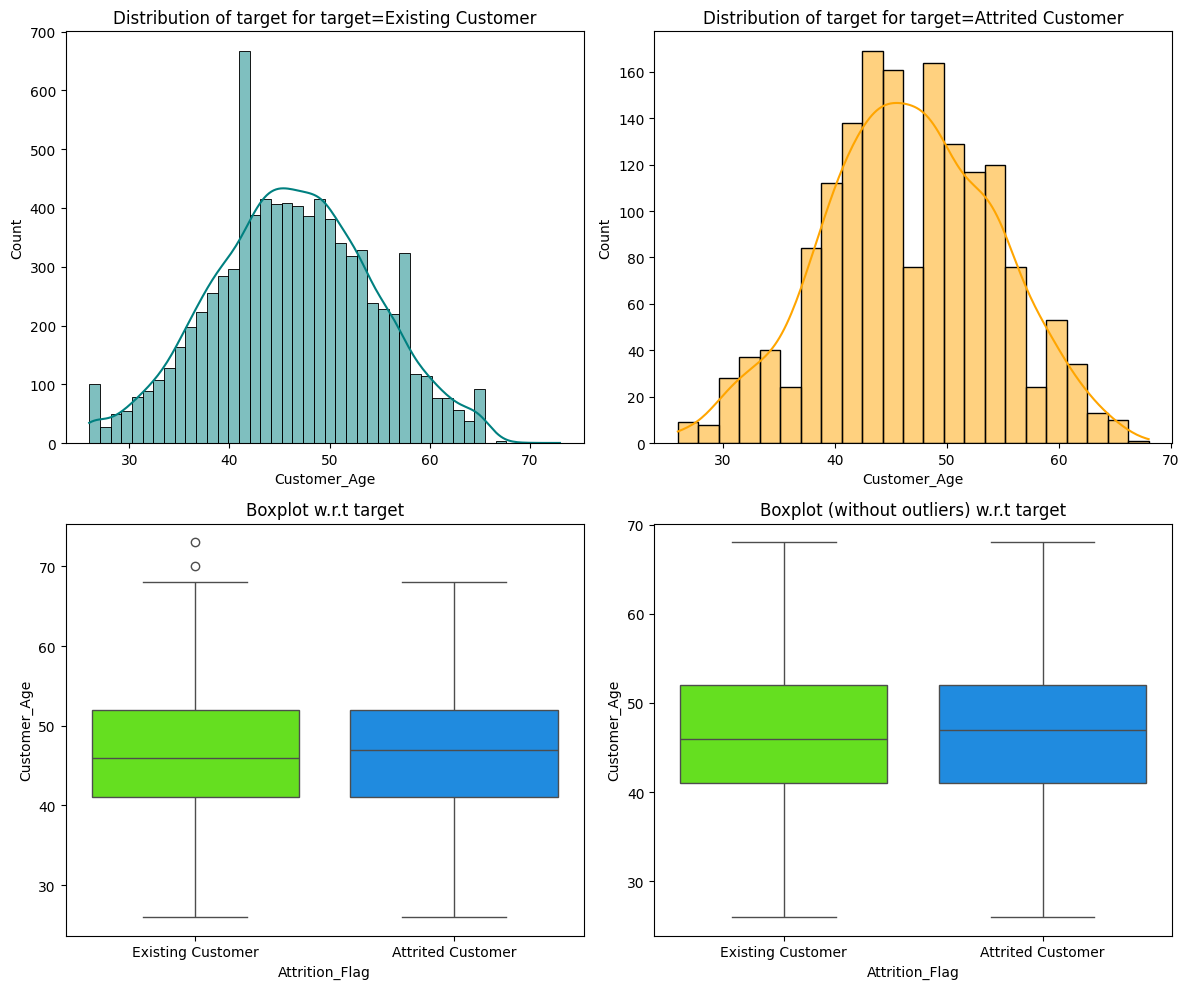

In [ ]:
distribution_plot_wrt_target(df, "Customer_Age", "Attrition_Flag")

**Observations:**

* Customer_Age appears to be nearly identically distributed for existing customer and attrited customers.


**Attrition_Flag vs Months_on_book**


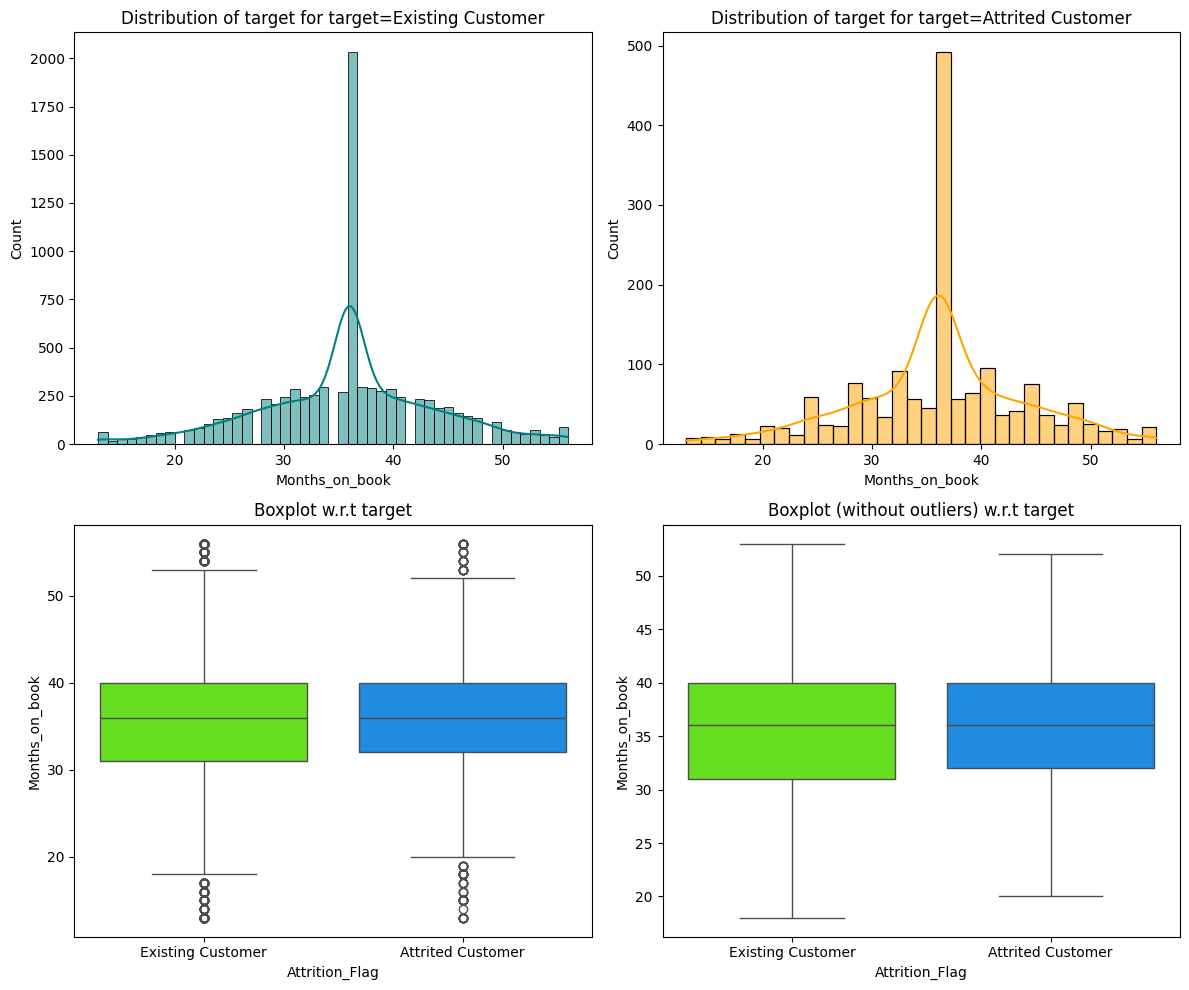

In [ ]:
distribution_plot_wrt_target(df, "Months_on_book", "Attrition_Flag")

**Observations:**

* Months_on_book appears to be nearly identically distributed for existing customer and attrited customers.

**Attrition_Flag vs Credit_Limit**


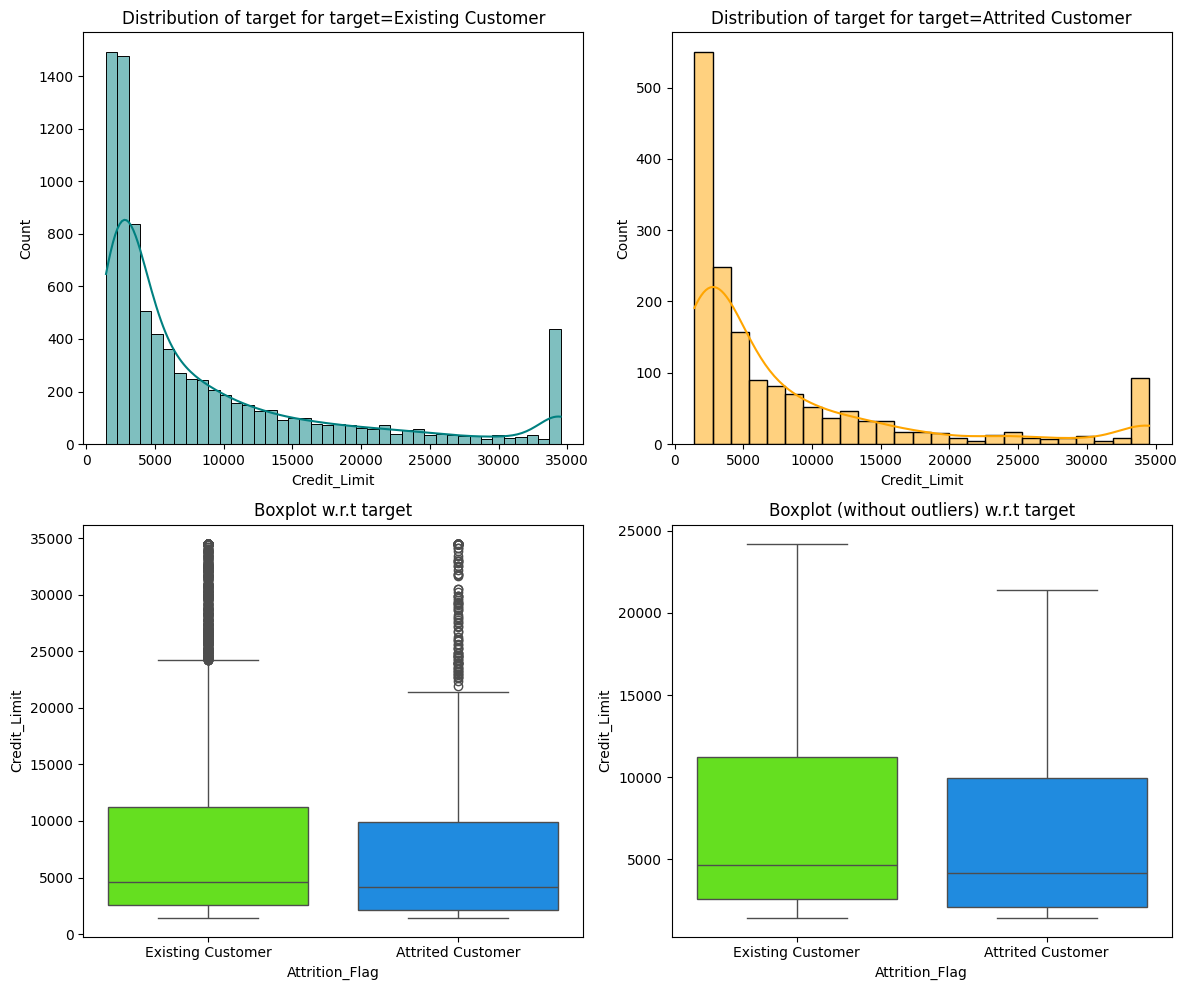

In [ ]:
distribution_plot_wrt_target(df, "Credit_Limit", "Attrition_Flag")

**Observations:**

* Customers with lower credit limits are the ones who attrited.

**Attrition_Flag vs Avg_Open_To_Buy**


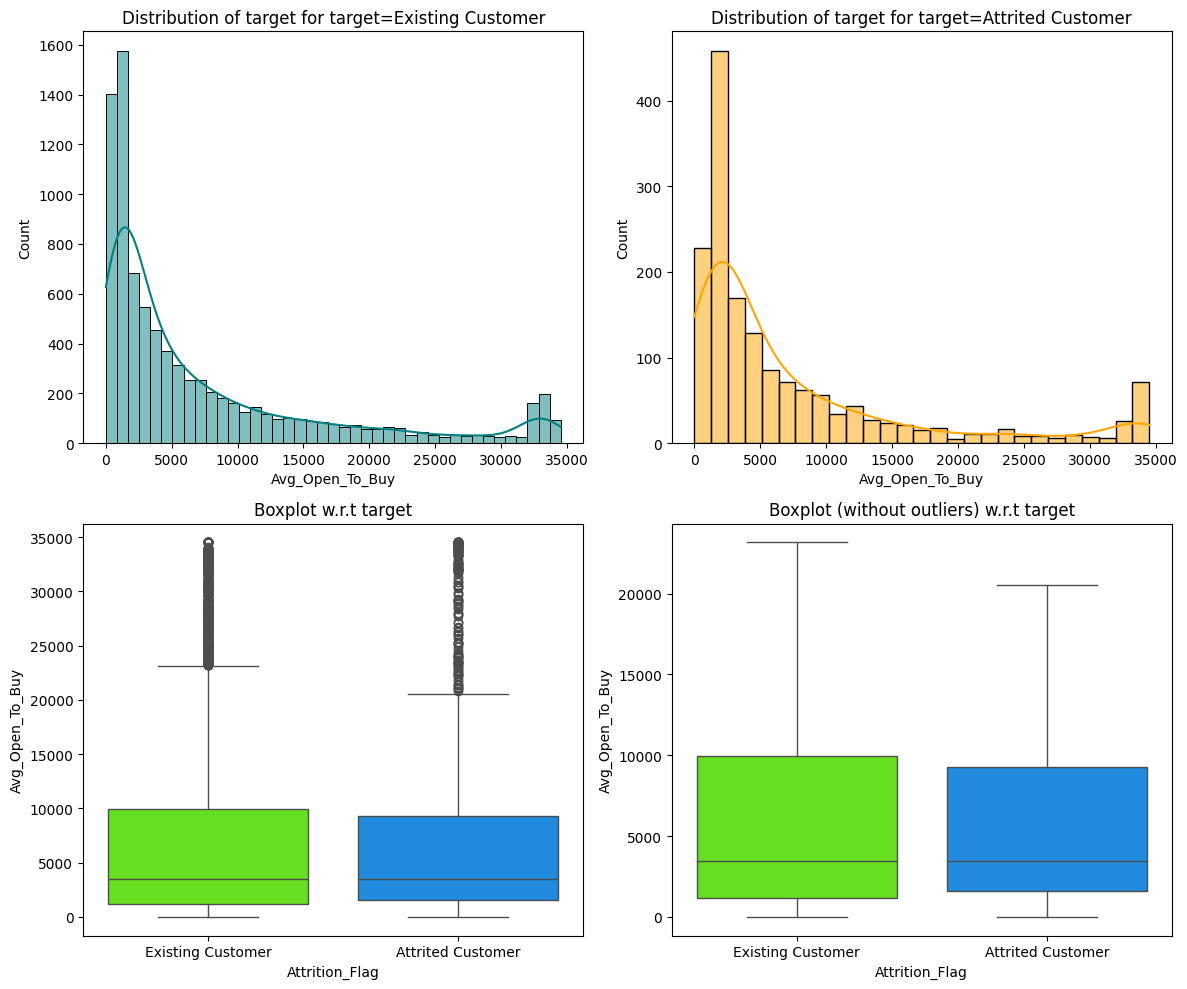

In [ ]:
distribution_plot_wrt_target(df, "Avg_Open_To_Buy", "Attrition_Flag")

**Observations:**

* Avg_Open_To_Buy appears to be nearly identically distributed for existing customer and attrited customers.


**Attrition_Flag vs Total_Revolving_Bal:**



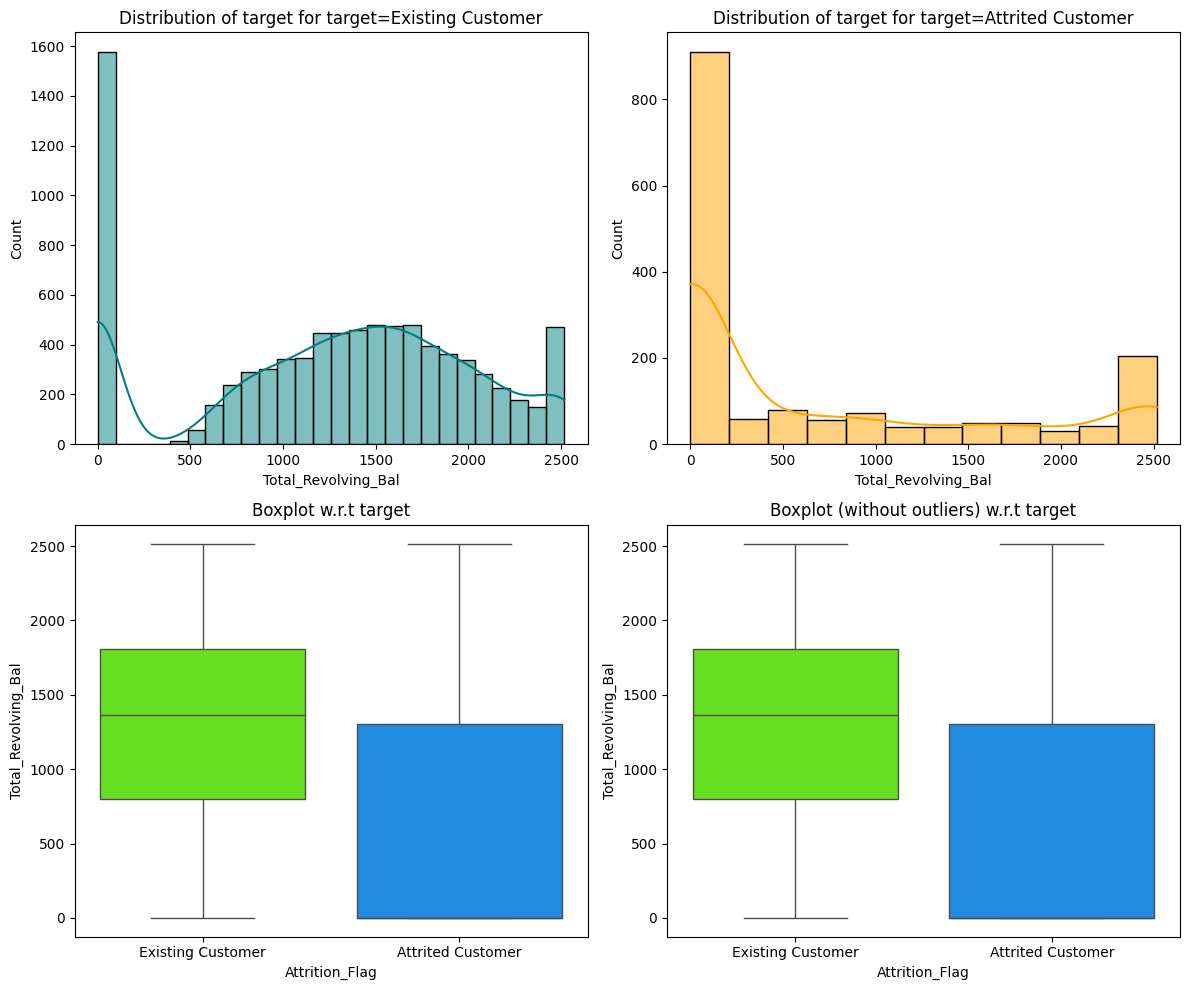

In [ ]:
distribution_plot_wrt_target(df, "Total_Revolving_Bal", "Attrition_Flag")

**Observations:**

* Total_Revolving_Bal has similar distributions for both attrited and existing customers, but the existing customers have a bulge in the center.
* Attrited customers have peaks at both the min and max of the distribution.

**Attrition_Flag vs Total_Trans_Amt**

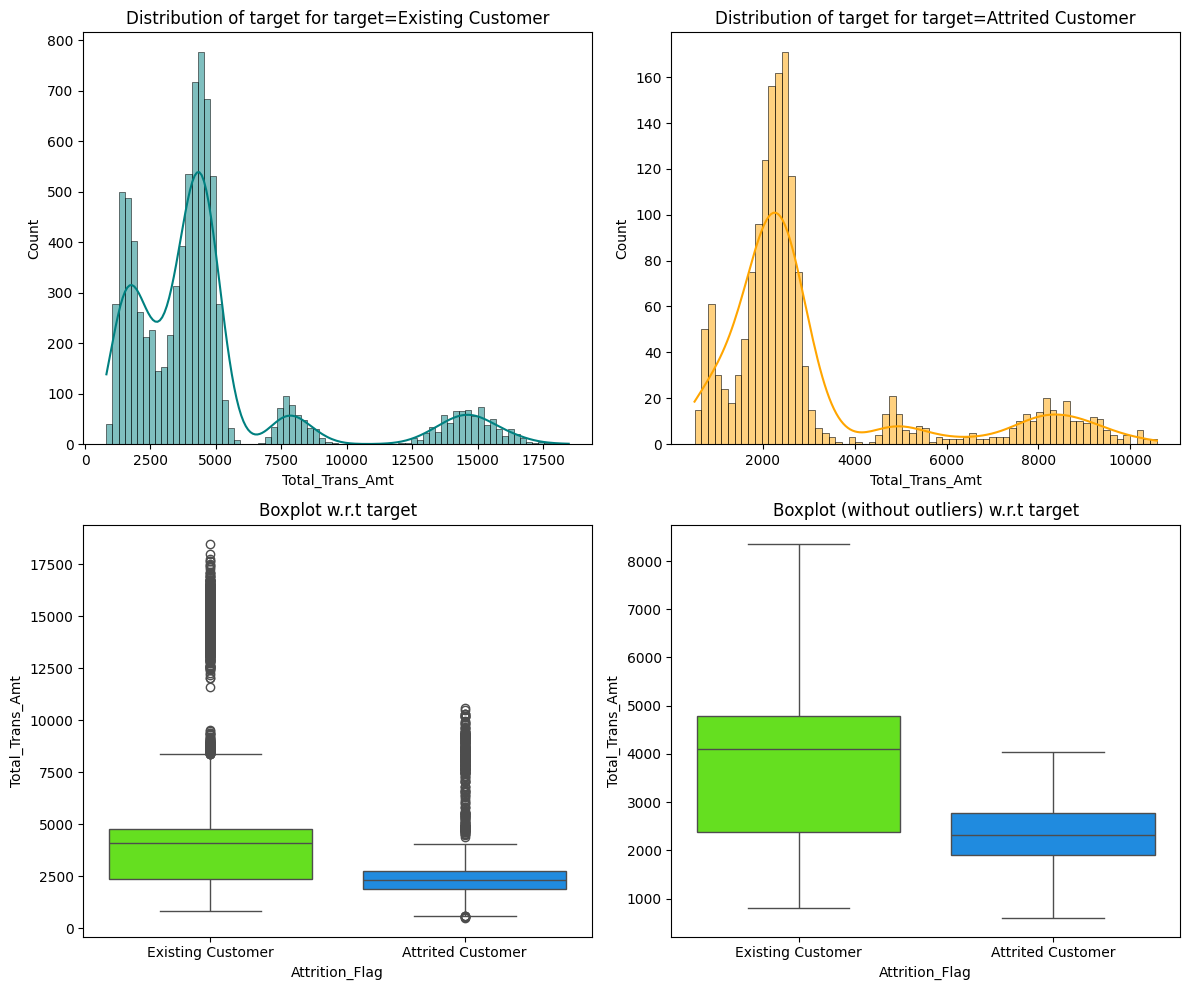

In [ ]:
distribution_plot_wrt_target(df, "Total_Trans_Amt", "Attrition_Flag")


**Observations:**

* The distribution of Total_Trans_Amt looks similar for both existing and attrited customers.
* The median Total_Trans_Amt for attrited customers is 2500, while the median for existing customers is closer to 4000.
* The IQR of Total_Trans_Amt for attrited customers is much smaller than that of existing customers.
* The maximum Total_Trans_Amt for attrited customers is about half as much compared to exsiting customers.


**Attrition_Flag vs Total_Trans_Ct**


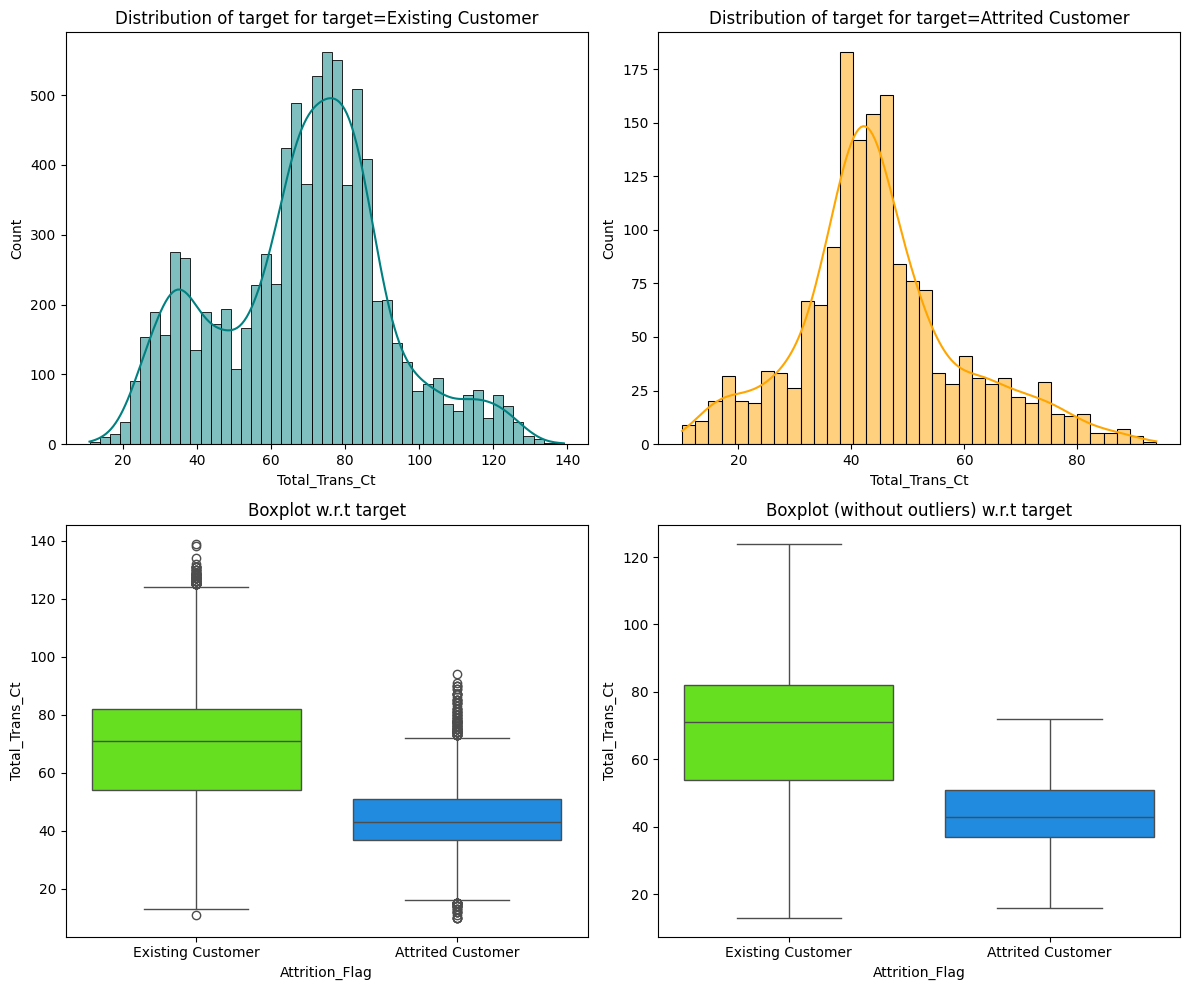

In [ ]:
distribution_plot_wrt_target(df, "Total_Trans_Ct", "Attrition_Flag")

**Observations:**

* The distribution of Total_Trans_Ct is more normally distributed for attrited customers.
* The distribution of Total_Trans_Ct for attrited customers is centered around 50 while for existing customers the center is around 70.
* Attrited customers have a much lower median and max Total_Trans_Ct than existing customers.

**Attrition_Flag vs Total_Ct_Chng_Q4_Q1**

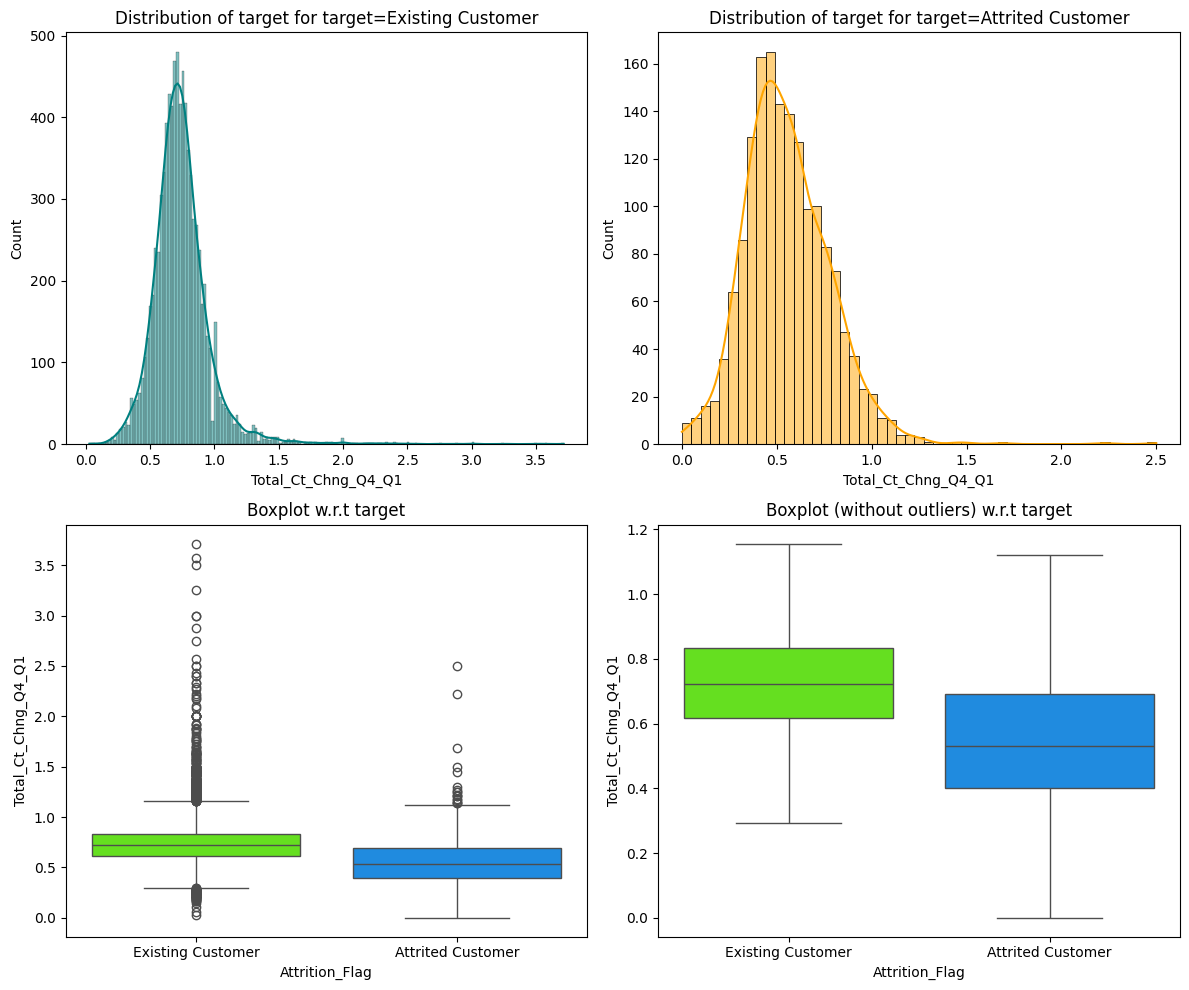

In [ ]:
distribution_plot_wrt_target(df, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

**Observations:**

* Distributions of Total_Ct_Chng_Q4_Q1 for both attrited and existing customers are normally distributed.
* Distribution of Total_Ct_Chng_Q4_Q1 is centered around 0.5 for attrited customers.
* Distribution of Total_Ct_Chng_Q4_Q1 is centered around 0.7 for existing customers.
* Median of Total_Ct_Chng_Q4_Q1 for existing customers is greater than that of 75% of attrited customers.
* Max of Total_Ct_Chng_Q4_Q1 for existing customers similar to attrited customers.
* Min of Total_Ct_Chng_Q4_Q1 for existing customer much greater than that of attrited customers


**Attrition_Flag vs Total_Amt_Chng_Q4_Q1**


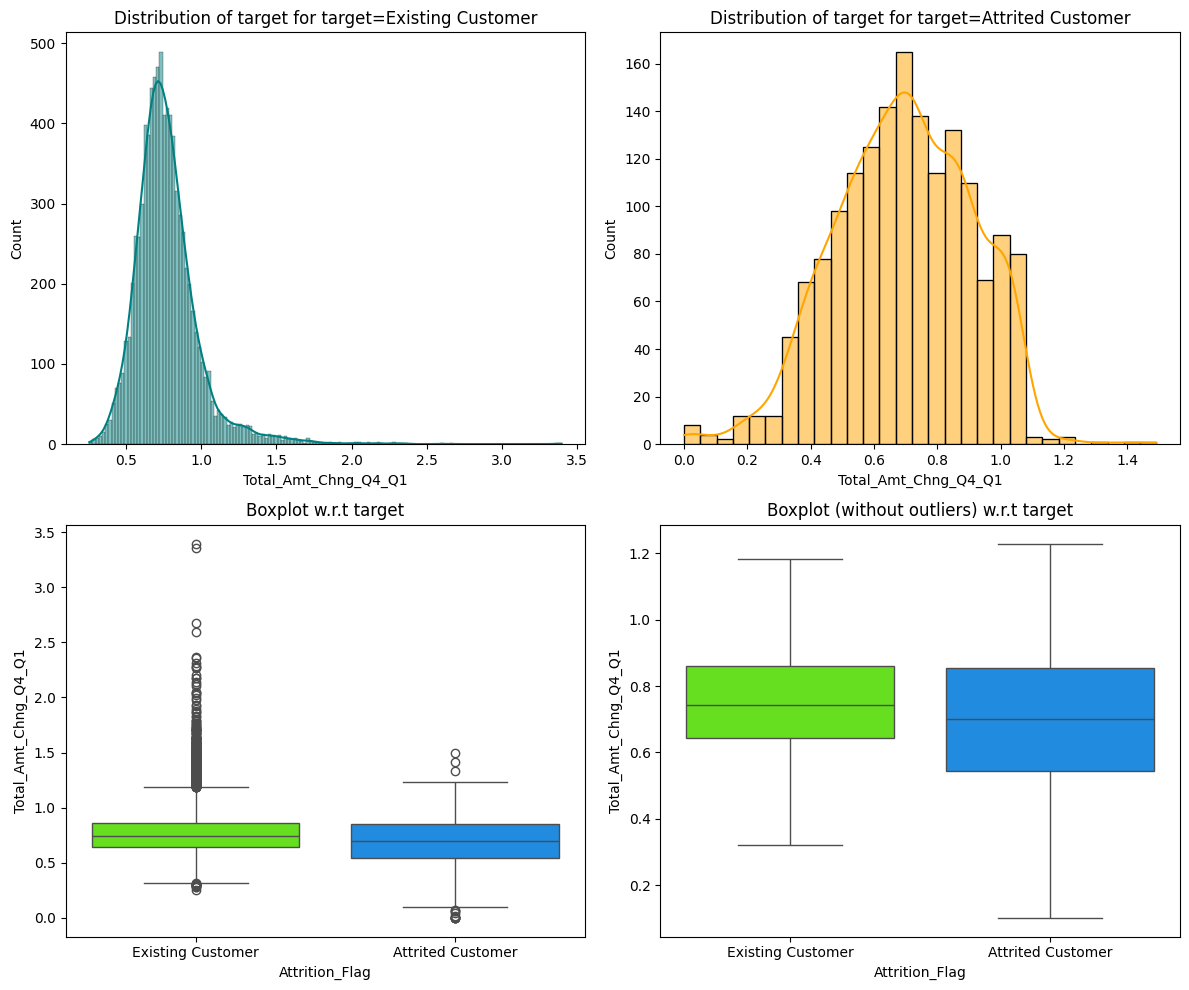

In [ ]:
distribution_plot_wrt_target(df, "Total_Amt_Chng_Q4_Q1", "Attrition_Flag")


**Observations:**

* Total_Amt_Chng_Q4_Q1 has similar distributions for both attrited customers.
* Median is higher for existing customers.
* Min is much lower for attrited customers.

**Attrition_Flag vs Avg_Utilization_Ratio**


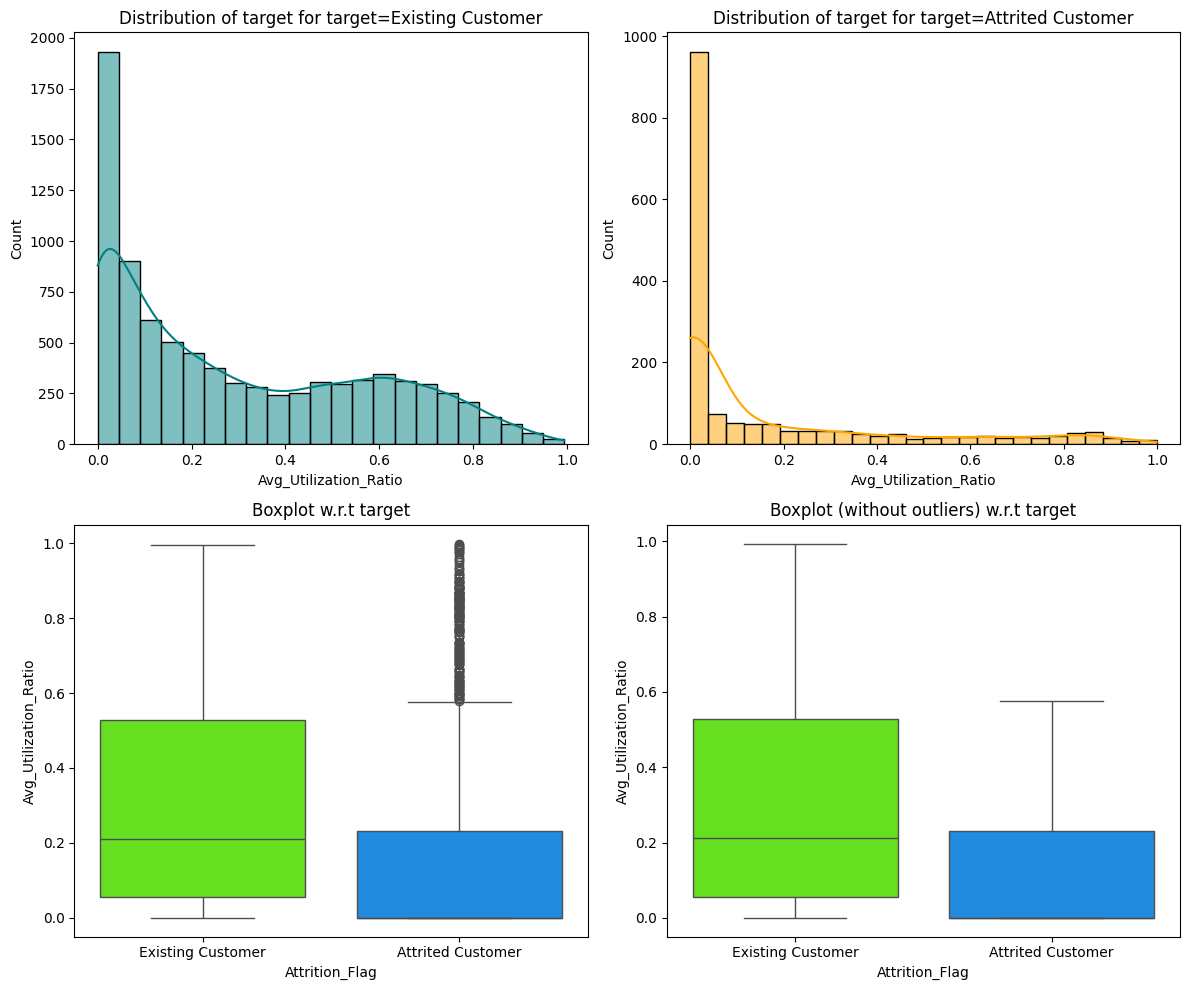

In [ ]:
distribution_plot_wrt_target(df, "Avg_Utilization_Ratio", "Attrition_Flag")

**Observations:**

* The median Avg_Utilization_Ratio for attrited customers is 20%.
* The median Avg_Utilization_Ratio for existing customers is 0%.
* Close to 75% of existing customers have an Avg_Utilization_Ratio less than the median of attrited customers.

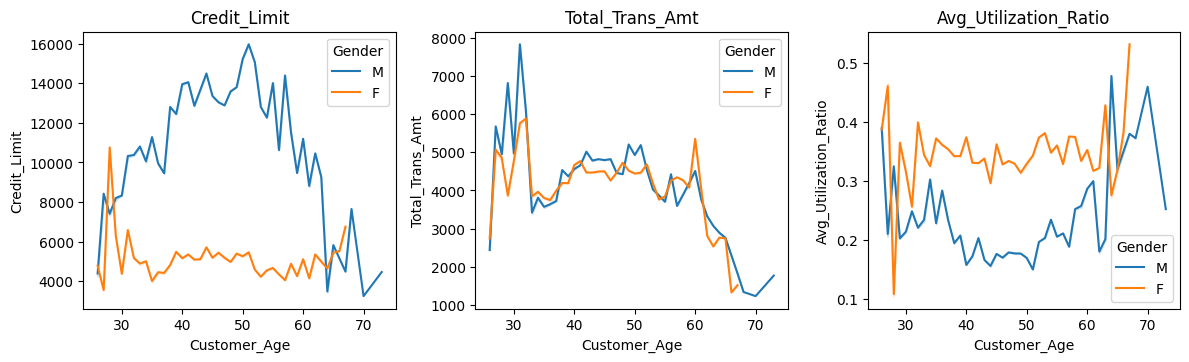

In [ ]:
cols = df[
    ["Credit_Limit", "Total_Trans_Amt", "Avg_Utilization_Ratio"]
].columns.tolist()
plt.figure(figsize=(12, 10))
for i, variable in enumerate(cols):
    plt.subplot(3, 3, i + 1)
    # Pass data as a dictionary with x and y specified
    sns.lineplot(x="Customer_Age", y=variable, hue="Gender", data=df, ci=0)
    plt.tight_layout()
    plt.title(variable)
plt.show()

**Observations:**

* With age the credit limit of male customers increased (till 50 years) but for the female customers the credit limit constant throughout.
* Although the credit limit for female customers is less the total transactions made by them for all age groups is the same.
* Female customers utilized their credits more as compared to the male customers where utilization dropped from 30-50 years but increased after 60 years.

**Observations on Dependent_count**


Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
All                           1627               8500  10127
3                              482               2250   2732
2                              417               2238   2655
1                              269               1569   1838
4                              260               1314   1574
0                              135                769    904
5                               64                360    424
------------------------------------------------------------------------------------------------------------------------


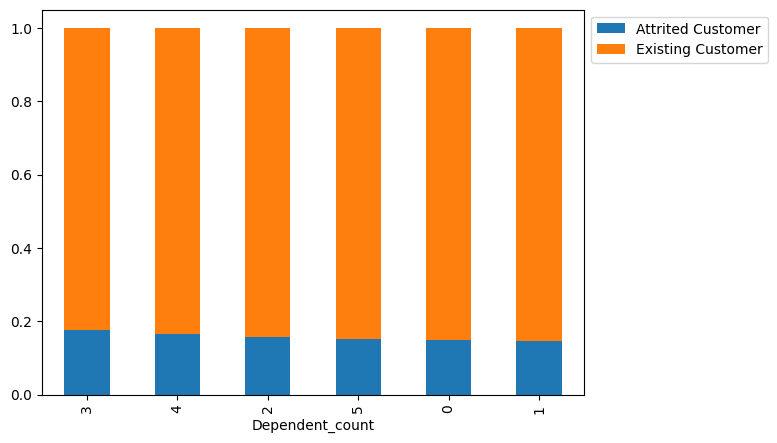

In [ ]:
stacked_barplot(df, "Dependent_count", "Attrition_Flag")

**Observations:**

* More the number of dependents more is the attrition, more responsibilities might lead to financial instability in such customers.
* Attrition is fairly low for customers with 0 or 1 dependents.

**Observations on Total_Relationship_Count**


Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
All                                    1627               8500  10127
3                                       400               1905   2305
2                                       346                897   1243
1                                       233                677    910
5                                       227               1664   1891
4                                       225               1687   1912
6                                       196               1670   1866
------------------------------------------------------------------------------------------------------------------------


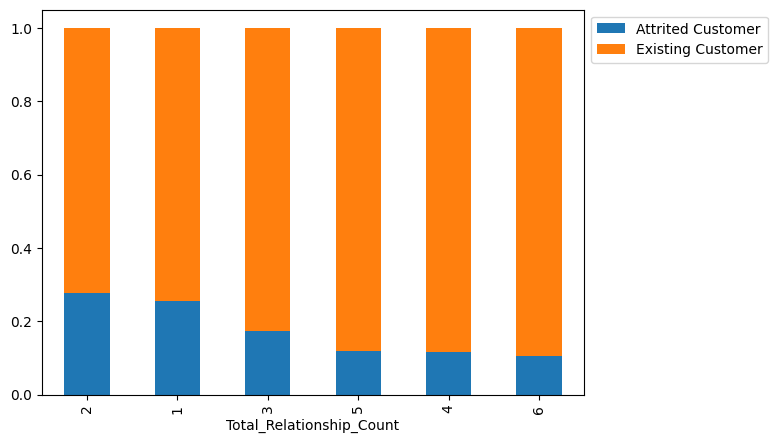

In [ ]:
stacked_barplot(df, "Total_Relationship_Count", "Attrition_Flag")

**Observations:**

* Attrition is highest among the customers who are using 1 or 2 products offered by the bank - together they constitute ~55% of the attrition.
* Customers who use more than 3 products are the ones least attriting, such customers might be more financially stable and actively invest in different services provided by the bank.

**Observations on Months_Inactive_12_mon**


Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
All                                  1627               8500  10127
3                                     826               3020   3846
2                                     505               2777   3282
4                                     130                305    435
1                                     100               2133   2233
5                                      32                146    178
6                                      19                105    124
0                                      15                 14     29
------------------------------------------------------------------------------------------------------------------------


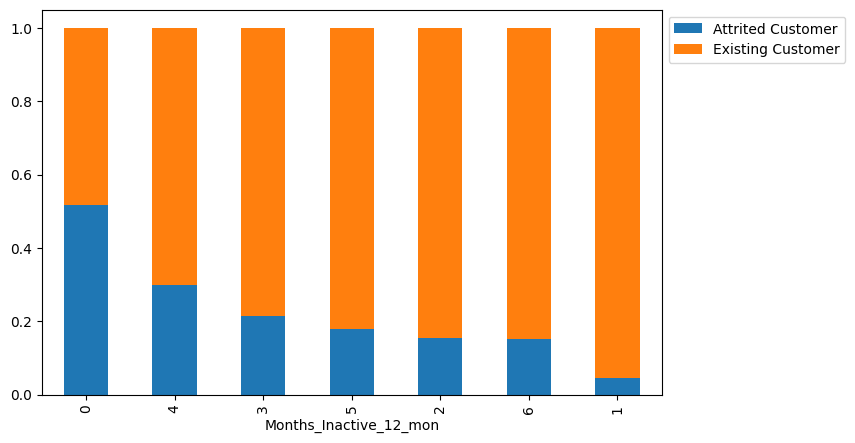

In [ ]:
stacked_barplot(df, "Months_Inactive_12_mon", "Attrition_Flag")

**Observations:**

* As inactivity increases attrition also increases (2-4 months)
* The interpretation from here for 0 months and 6 months is difficult as customers who recently used the card attrited the most while those who were inactive for 6 months attrited less.

**Observations on Contacts_Count_12_mon**


Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
All                                 1627               8500  10127
3                                    681               2699   3380
2                                    403               2824   3227
4                                    315               1077   1392
1                                    108               1391   1499
5                                     59                117    176
6                                     54                  0     54
0                                      7                392    399
------------------------------------------------------------------------------------------------------------------------


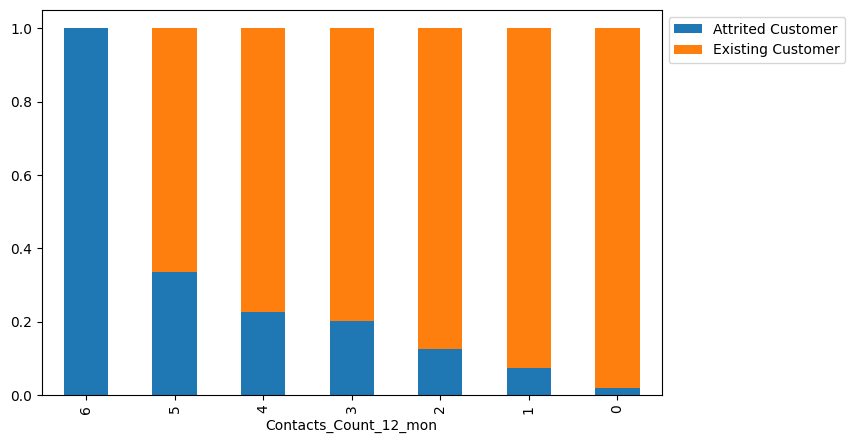

In [ ]:
stacked_barplot(df, "Contacts_Count_12_mon", "Attrition_Flag")

**Observations:**

* Highest attrition is among the customers who interacted the most with the bank.
* This signifies that the bank is not able to resolve the problems faced by customers leading to attrition
* A preliminary step to identify attriting customers would be to look out for customers who have reached out to them repeatedly.

**Observations on Gender**


Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


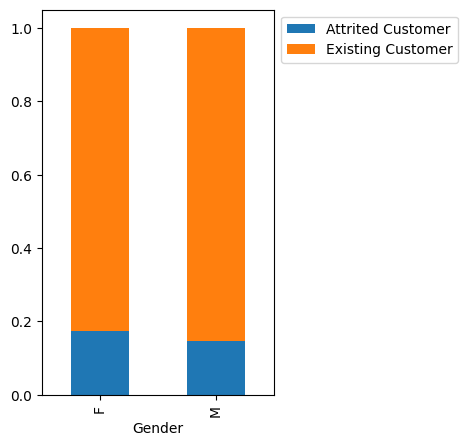

In [ ]:
stacked_barplot(df, "Gender", "Attrition_Flag")

**Observations:**

*  There's not much difference in attrition percentages for Males and Females.
* ~20% of both Males and Females attrite.

**Observations on Education_Level**


Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


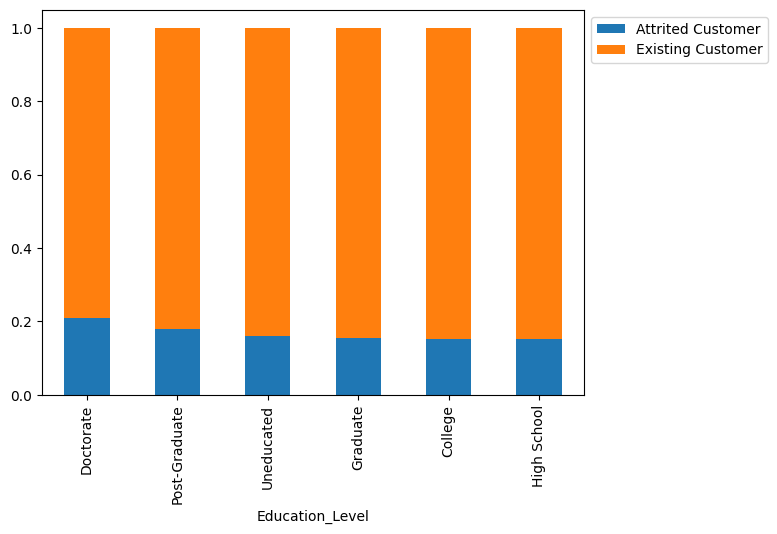

In [ ]:
stacked_barplot(df, "Education_Level", "Attrition_Flag")

**Observations:**

* Customers with higher education - Doctorates and Post Graduates are the ones most(~20% for both education levels) attriting.


**Observations on Marital_Status**

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
------------------------------------------------------------------------------------------------------------------------


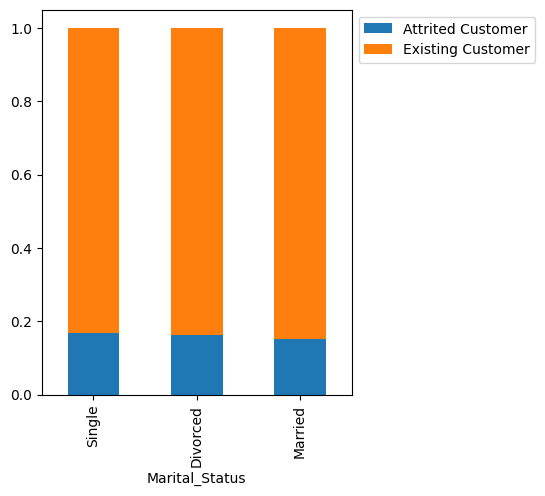

In [ ]:
stacked_barplot(df, "Marital_Status", "Attrition_Flag")

**Observations:**

* There's not much difference in attrition percentages for Marital_Status.
* ~20% of Singles, Divorced attrite.
* Married customers attrite the least.

**Observations on Income_Category**

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
abc                            187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


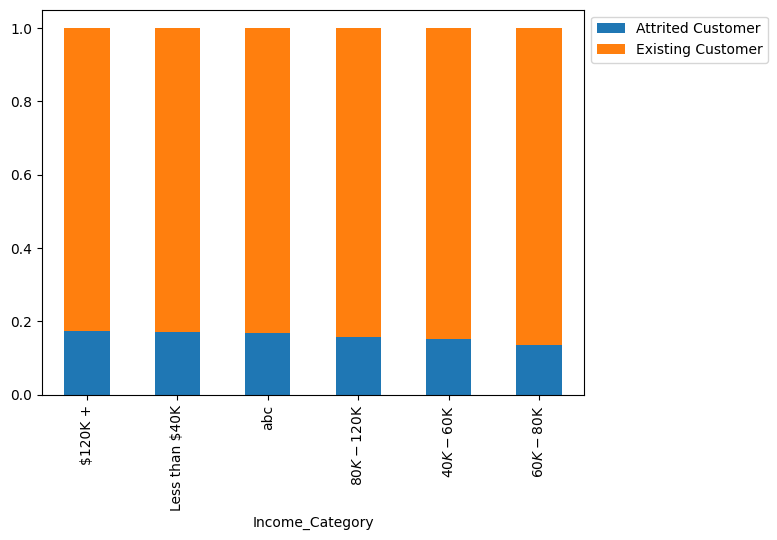

In [ ]:
stacked_barplot(df, "Income_Category", "Attrition_Flag")

**Observations:**


* The customers from two extreme income groups - Earning less than 40K and Earning more than 120k+ are the ones attriting the most.

**Observations on Card_Category**


Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------


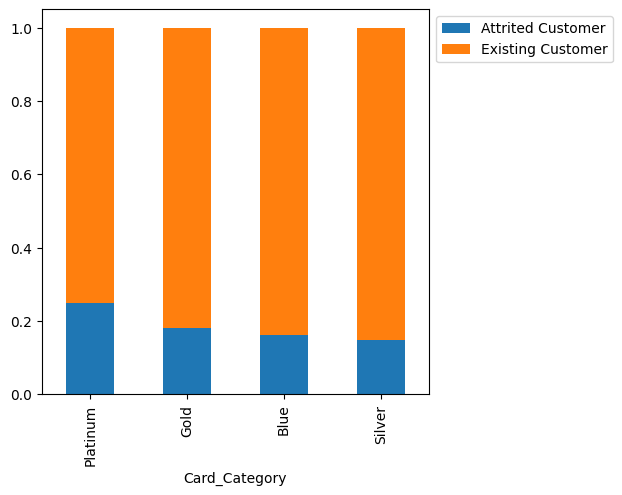

In [ ]:
stacked_barplot(df, "Card_Category", "Attrition_Flag")

**Observations:**


* ~35% of attrition is amongst the customers with platinum cards followed by ~30% attrition in Gold cards.
* Customers with Platinum and Gold cards are our premium customers and the highest attrition for these customers is alarming as they are using the premium card provided by the bank.


## Data Pre-processing

**Outlier Detection**

In [ ]:
# Code to be used checking for outliers.
# Select only numerical features for outlier analysis
numerical_df = df.select_dtypes(include=np.number)

Q1 = numerical_df.quantile(0.25)  # The 25th percentile.
Q3 = numerical_df.quantile(0.75)  # The 75th percentile.

IQR = Q3 - Q1           # Inter Quantile Range (75th perentile - 25th percentile)

lower = Q1 - 1.5 * IQR  # Finding the lower bounds for all values. All values outside these bounds are outliers.
upper = Q3 + 1.5 * IQR  # Finding the upper bounds for all values. All values outside these bounds are outliers.

In [ ]:
# Checking the percentages of outliers, as defined by the previous cell.
((df.select_dtypes(include=["float64", "int64"]) < lower)
    |(df.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(df) * 100

,0
CLIENTNUM,0.000
Customer_Age,0.020
Dependent_count,0.000
Months_on_book,3.812
Total_Relationship_Count,0.000
Months_Inactive_12_mon,3.268
Contacts_Count_12_mon,6.211
Credit_Limit,9.717
Total_Revolving_Bal,0.000
Avg_Open_To_Buy,9.509


**Observations:**

* It was determined not necessary to treat any outliers.
* Although some values are outside the outlier range, these values are determined as significant for analysis.

**Train-test split**


In [8]:
# Creating the independent variable data frame.
X = df.drop('Attrition_Flag', axis=1)
# Creating the dependent variable data frame.
y = df['Attrition_Flag']

**Split data into independent and dependent variables.**


In [9]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 20) (2026, 20) (2026, 20)


**Missing value imputation**


In [ ]:
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

In [ ]:
# Creating an imputer to impute values by the mode.
imputer = SimpleImputer(strategy="most_frequent")

In [ ]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the validation data
X_val[reqd_col_for_impute] = imputer.transform(X_val[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

CLIENTNUM                   0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
CLIENTNUM                   0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon     

**Observations:**

* All missing values have been treated.


In [ ]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Gender
F    3205
M    2870
Name: count, dtype: int64
******************************
Education_Level
Graduate         2763
High School      1212
Uneducated        928
College           598
Post-Graduate     299
Doctorate         275
Name: count, dtype: int64
******************************
Marital_Status
Married     3280
Single      2346
Divorced     449
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    2130
$40K - $60K       1076
$80K - $120K       918
$60K - $80K        847
abc                668
$120K +            436
Name: count, dtype: int64
******************************
Card_Category
Blue        5668
Silver       327
Gold          71
Platinum       9
Name: count, dtype: int64
******************************


In [ ]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

Gender
F    1106
M     920
Name: count, dtype: int64
******************************
Education_Level
Graduate         935
High School      399
Uneducated       278
College          217
Post-Graduate    108
Doctorate         89
Name: count, dtype: int64
******************************
Marital_Status
Married     1057
Single       814
Divorced     155
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    712
$40K - $60K       340
$80K - $120K      306
$60K - $80K       280
abc               248
$120K +           140
Name: count, dtype: int64
******************************
Card_Category
Blue        1893
Silver       108
Gold          19
Platinum       6
Name: count, dtype: int64
******************************


In [ ]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Gender
F    3205
M    2870
Name: count, dtype: int64
******************************
Education_Level
Graduate         2763
High School      1212
Uneducated        928
College           598
Post-Graduate     299
Doctorate         275
Name: count, dtype: int64
******************************
Marital_Status
Married     3280
Single      2346
Divorced     449
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    2130
$40K - $60K       1076
$80K - $120K       918
$60K - $80K        847
abc                668
$120K +            436
Name: count, dtype: int64
******************************
Card_Category
Blue        5668
Silver       327
Gold          71
Platinum       9
Name: count, dtype: int64
******************************


**Encoding categorical variables**


In [10]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 31) (2026, 31) (2026, 31)


**Observations:**

*   After encoding there are 31 columns.



In [11]:
X_train.head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_abc,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
9501,789394833,47,2,37,1,2,2,21714.000,1969,19745.000,0.944,13270,104,0.625,0.091,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
5065,720057183,49,4,42,5,1,4,7789.000,957,6832.000,0.724,3412,70,0.842,0.123,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False
2375,709212183,53,2,36,6,1,3,3176.000,1470,1706.000,0.388,1634,53,0.472,0.463,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False
7579,779947908,56,2,45,3,3,1,3296.000,1435,1861.000,0.968,4327,66,0.737,0.435,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2776,721023708,47,4,36,3,3,3,17557.000,0,17557.000,0.667,2142,62,0.378,0.000,True,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False


In [12]:
# Checking information of new data frame's columns.
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6075 entries, 9501 to 703
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CLIENTNUM                       6075 non-null   int64  
 1   Customer_Age                    6075 non-null   int64  
 2   Dependent_count                 6075 non-null   int64  
 3   Months_on_book                  6075 non-null   int64  
 4   Total_Relationship_Count        6075 non-null   int64  
 5   Months_Inactive_12_mon          6075 non-null   int64  
 6   Contacts_Count_12_mon           6075 non-null   int64  
 7   Credit_Limit                    6075 non-null   float64
 8   Total_Revolving_Bal             6075 non-null   int64  
 9   Avg_Open_To_Buy                 6075 non-null   float64
 10  Total_Amt_Chng_Q4_Q1            6075 non-null   float64
 11  Total_Trans_Amt                 6075 non-null   int64  
 12  Total_Trans_Ct                  6075 

**Observations:**

* Observed data types of training set.


In [13]:
# Checking information of new data frame's columns.
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2026 entries, 134 to 8597
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CLIENTNUM                       2026 non-null   int64  
 1   Customer_Age                    2026 non-null   int64  
 2   Dependent_count                 2026 non-null   int64  
 3   Months_on_book                  2026 non-null   int64  
 4   Total_Relationship_Count        2026 non-null   int64  
 5   Months_Inactive_12_mon          2026 non-null   int64  
 6   Contacts_Count_12_mon           2026 non-null   int64  
 7   Credit_Limit                    2026 non-null   float64
 8   Total_Revolving_Bal             2026 non-null   int64  
 9   Avg_Open_To_Buy                 2026 non-null   float64
 10  Total_Amt_Chng_Q4_Q1            2026 non-null   float64
 11  Total_Trans_Amt                 2026 non-null   int64  
 12  Total_Trans_Ct                  2026 

**Observations:**

* Observed data types of validation set.

In [14]:
# Checking information of new data frame's columns.
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2026 entries, 7876 to 8334
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CLIENTNUM                       2026 non-null   int64  
 1   Customer_Age                    2026 non-null   int64  
 2   Dependent_count                 2026 non-null   int64  
 3   Months_on_book                  2026 non-null   int64  
 4   Total_Relationship_Count        2026 non-null   int64  
 5   Months_Inactive_12_mon          2026 non-null   int64  
 6   Contacts_Count_12_mon           2026 non-null   int64  
 7   Credit_Limit                    2026 non-null   float64
 8   Total_Revolving_Bal             2026 non-null   int64  
 9   Avg_Open_To_Buy                 2026 non-null   float64
 10  Total_Amt_Chng_Q4_Q1            2026 non-null   float64
 11  Total_Trans_Amt                 2026 non-null   int64  
 12  Total_Trans_Ct                  2026

**Observations:**

* Observed data types of test set.

**The data is prepared for model building.**


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [15]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [16]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building with original data

Sample code for model building with original data

In [17]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
df["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
df["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))


# Convert y_train and y_val to numeric before training
y_train = y_train.map({'Existing Customer': 0, 'Attrited Customer': 1}).astype(int)
y_val = y_val.map({'Existing Customer': 0, 'Attrited Customer': 1}).astype(int)


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    # Assuming 'Attrited Customer' is the positive class (1)
    scores = recall_score(y_train, model.predict(X_train), pos_label=1)
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    # Assuming 'Existing Customer' is the negative class (0)
    scores_val = recall_score(y_val, model.predict(X_val), pos_label=0)
    print("{}: {}".format(name, scores_val))


Training Performance:

Logistic regression: 0.03790983606557377
Bagging: 0.9795081967213115
Random forest: 1.0
GBM: 0.8995901639344263
Adaboost: 0.7213114754098361
Xgboost: 1.0
dtree: 1.0

Validation Performance:

Logistic regression: 1.0
Bagging: 0.9847058823529412
Random forest: 0.9870588235294118
GBM: 0.9876470588235294
Adaboost: 0.9852941176470589
Xgboost: 0.9876470588235294
dtree: 0.9652941176470589


**Performance comparison**


* Observed the precision scores of 5 models that were fit on orginal training data.


### Model Building with Oversampled data


In [18]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 31)
After Oversampling, the shape of train_y: (10198,) 



In [19]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Logistic regression: 0.7007256324769563
Bagging: 0.9974504804863699
Random forest: 1.0
GBM: 0.9748970386350265
Adaboost: 0.9405765836438518
Xgboost: 1.0
dtree: 1.0

Validation Performance:

Logistic regression: 0.6349693251533742
Bagging: 0.843558282208589
Random forest: 0.8343558282208589
GBM: 0.852760736196319
Adaboost: 0.8190184049079755
Xgboost: 0.8834355828220859
dtree: 0.7944785276073619


**Performance comparison**


* Observed the precision scores of 5 models that were fit on oversampled training data.


### Model Building with Undersampled data

In [20]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [21]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 31)
After Under Sampling, the shape of train_y: (1952,) 



In [22]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Logistic regression: 0.6721311475409836
Bagging: 0.9907786885245902
Random forest: 1.0
GBM: 0.9774590163934426
Adaboost: 0.9477459016393442
Xgboost: 1.0
dtree: 1.0

Validation Performance:

Logistic regression: 0.6380368098159509
Bagging: 0.8650306748466258
Random forest: 0.911042944785276
GBM: 0.9141104294478528
Adaboost: 0.9079754601226994
Xgboost: 0.9233128834355828
dtree: 0.8711656441717791


**Performance comparison**


* Observed the precision scores of 5 models that were fit on undersampled training data.

### HyperparameterTuning

* Chose 9 models for tuning, 3 from each training data category (original/oversampled/undersampled).
* Of each category, the 3 models selected were those with the highest Precision performance on the validation data.

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

#### Tuning for Gradient Boosting with original data


In [23]:
#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))


Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8206802721088435:


In [24]:
tuned_gbm = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=100,
    max_features=0.5,
    learning_rate=0.1,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.9)

In [26]:
# Checking model's performance on training set
gbm_train = model_performance_classification_sklearn(
    tuned_gbm, X_train, y_train
)
gbm_train

,Accuracy,Recall,Precision,F1
0,0.977,0.889,0.962,0.924


In [27]:
# Checking model's performance on validation set
gbm_val = model_performance_classification_sklearn(tuned_gbm, X_val, y_val)
gbm_val

,Accuracy,Recall,Precision,F1
0,0.959,0.794,0.938,0.860


#### Tuning method for Gradient Boosting with Over sampled data



In [28]:
#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.01, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9460716965883508:


In [29]:
tuned_gbm_over = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=100,
    max_features=0.7,
    learning_rate=0.01,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=0.7, random_state=1,
                           subsample=0.7)

In [30]:
# Checking model's performance on training set
gbm_train_over = model_performance_classification_sklearn(
    tuned_gbm_over, X_train_over, y_train_over
)
gbm_train_over

,Accuracy,Recall,Precision,F1
0,0.934,0.958,0.914,0.935


In [31]:
# Checking model's performance on validation set
gbm_val_over = model_performance_classification_sklearn(tuned_gbm_over, X_val, y_val)
gbm_val_over

,Accuracy,Recall,Precision,F1
0,0.916,0.880,0.687,0.772


#### Tuning method for Gradient Boosting with Under sampled data


In [32]:
#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9538827838827839:


In [33]:
tuned_gbm_un = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=75,
    max_features=0.7,
    learning_rate=0.1,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm_un.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=75, random_state=1,
                           subsample=0.9)

In [34]:
# Checking model's performance on training set
gbm_train_un = model_performance_classification_sklearn(
    tuned_gbm_un, X_train_un, y_train_un
)
gbm_train_un

,Accuracy,Recall,Precision,F1
0,0.968,0.977,0.960,0.969


In [35]:
# Checking model's performance on validation set
gbm_val_un = model_performance_classification_sklearn(tuned_gbm_un, X_val, y_val)
gbm_val_un

,Accuracy,Recall,Precision,F1
0,0.941,0.908,0.767,0.831


### Tuning method for AdaBoosting with original data


In [37]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50, 110, 25),
    "learning_rate": [0.01, 0.1, 0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)
#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_, randomized_cv.best_score_))


Best parameters are {'n_estimators': 75, 'learning_rate': 0.05, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9515618926667821:


In [39]:
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=100,
    learning_rate=0.1,
    estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [45]:
# Checking model's performance on training set
adb_train_over = model_performance_classification_sklearn(tuned_adb_over, X_train_over, y_train_over)
adb_train_over

,Accuracy,Recall,Precision,F1
0,0.917,0.916,0.917,0.917


In [46]:
# Checking model's performance on validation set
adb_val_over = model_performance_classification_sklearn(tuned_adb_over, X_val, y_val)
adb_val_over

,Accuracy,Recall,Precision,F1
0,0.914,0.856,0.686,0.761


### Tuning method for AdaBoosting with Undersampled data


In [47]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 75, 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9436525379382523:


In [50]:
tuned_adb_un = AdaBoostClassifier(
    random_state=1,
    n_estimators=100,
    learning_rate=0.05,
    estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb_un.fit(X_train_un, y_train_un)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.05, n_estimators=100, random_state=1)

In [51]:
# Checking model's performance on training set
adb_train_un = model_performance_classification_sklearn(tuned_adb_un, X_train_un, y_train_un)
adb_train_un

,Accuracy,Recall,Precision,F1
0,0.940,0.953,0.929,0.941


In [52]:
# Checking model's performance on validation set
adb_val_un = model_performance_classification_sklearn(tuned_adb_un, X_val, y_val)
adb_val_un

,Accuracy,Recall,Precision,F1
0,0.925,0.914,0.708,0.798


### Tuning method for Random Forest with original data


In [53]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 110, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.7509942438513868:


In [54]:
tuned_rfc = RandomForestClassifier(
    random_state=1,
    n_estimators=25,
    min_samples_leaf=1,
    max_features='sqrt',
    max_samples=0.5

)
tuned_rfc.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.5, n_estimators=25, random_state=1)

In [55]:
# Checking model's performance on training set
rfc_train = model_performance_classification_sklearn(tuned_rfc, X_train, y_train)
rfc_train

,Accuracy,Recall,Precision,F1
0,0.992,0.959,0.993,0.976


In [56]:
# Checking model's performance on validation set
rfc_val = model_performance_classification_sklearn(tuned_rfc, X_val, y_val)
rfc_val

,Accuracy,Recall,Precision,F1
0,0.942,0.712,0.910,0.799


### Tuning method for Random Forest with Oversampled data


In [57]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 110, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.962939637091343:


In [58]:
tuned_rfc_over = RandomForestClassifier(
    random_state=1,
    n_estimators=110,
    min_samples_leaf=1,
    max_features='sqrt',
    max_samples=0.6

)
tuned_rfc_over.fit(X_train_over, y_train_over)

RandomForestClassifier(max_samples=0.6, n_estimators=110, random_state=1)

In [59]:
# Checking model's performance on training set
rfc_train_over = model_performance_classification_sklearn(tuned_rfc_over, X_train, y_train)
rfc_train_over

,Accuracy,Recall,Precision,F1
0,0.999,1.000,0.993,0.996


In [60]:
# Checking model's performance on validation set
rfc_val_over = model_performance_classification_sklearn(tuned_rfc_over, X_val, y_val)
rfc_val_over

,Accuracy,Recall,Precision,F1
0,0.946,0.837,0.827,0.832


### Tuning method for Random Forest with Under sampled data


In [61]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 110, 'min_samples_leaf': 2, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9313657770800627:


In [62]:
tuned_rfc_un = RandomForestClassifier(
    random_state=1,
    n_estimators=110,
    min_samples_leaf=1,
    max_features='sqrt',
    max_samples=0.4

)
tuned_rfc_un.fit(X_train_un, y_train_un)

RandomForestClassifier(max_samples=0.4, n_estimators=110, random_state=1)

In [63]:
# Checking model's performance on training set
rfc_train_un = model_performance_classification_sklearn(tuned_rfc_un, X_train_un, y_train_un)
rfc_train_un

,Accuracy,Recall,Precision,F1
0,0.989,0.993,0.985,0.989


In [64]:
# Checking model's performance on validation set
rfc_val_un = model_performance_classification_sklearn(tuned_rfc_un, X_val, y_val)
rfc_val_un

,Accuracy,Recall,Precision,F1
0,0.926,0.883,0.720,0.793


## Model Comparison and Final Model Selection

### Training set final performance


In [68]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        adb_train.T,
        adb_train_over.T,
        adb_train_un.T,
        rfc_train.T,
        rfc_train_over.T,
        rfc_train_un.T,
        gbm_train.T,
        gbm_train_over.T,
        gbm_train_un.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "AdaBoost Original",
    "AdaBoost Oversampled",
    "Ada Undersampled",
    "Random Forest Original",
    "Random Forest Oversampled",
    "Random Forest Undersampled",
    "Gradient Boosting Original",
    "Gradient Boosting Oversampled",
    "Gradient Boosting Undersampled",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,AdaBoost Original,AdaBoost Oversampled,Ada Undersampled,Random Forest Original,Random Forest Oversampled,Random Forest Undersampled,Gradient Boosting Original,Gradient Boosting Oversampled,Gradient Boosting Undersampled
Accuracy,0.888,0.917,0.940,0.992,0.999,0.989,0.977,0.934,0.968
Recall,0.787,0.916,0.953,0.959,1.000,0.993,0.889,0.958,0.977
Precision,0.987,0.917,0.929,0.993,0.993,0.985,0.962,0.914,0.960
F1,0.876,0.917,0.941,0.976,0.996,0.989,0.924,0.935,0.969


In [70]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        adb_val.T,
        adb_val_over.T,
        adb_val_un.T,
        rfc_val.T,
        rfc_val_over.T,
        rfc_val_un.T,
        gbm_val.T,
        gbm_val_over.T,
        gbm_val_un.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "AdaBoost Original",
    "AdaBoost Oversampled",
    "Ada Undersampled",
    "Random Forest Original",
    "Random Forest Oversampled",
    "Random Forest Undersampled",
    "Gradient Boosting Original",
    "Gradient Boosting Oversampled",
    "Gradient Boosting Undersampled",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,AdaBoost Original,AdaBoost Oversampled,Ada Undersampled,Random Forest Original,Random Forest Oversampled,Random Forest Undersampled,Gradient Boosting Original,Gradient Boosting Oversampled,Gradient Boosting Undersampled
Accuracy,0.952,0.914,0.925,0.942,0.946,0.926,0.959,0.916,0.941
Recall,0.761,0.856,0.914,0.712,0.837,0.883,0.794,0.880,0.908
Precision,0.925,0.686,0.708,0.910,0.827,0.720,0.938,0.687,0.767
F1,0.835,0.761,0.798,0.799,0.832,0.793,0.860,0.772,0.831


**Feature Importance**


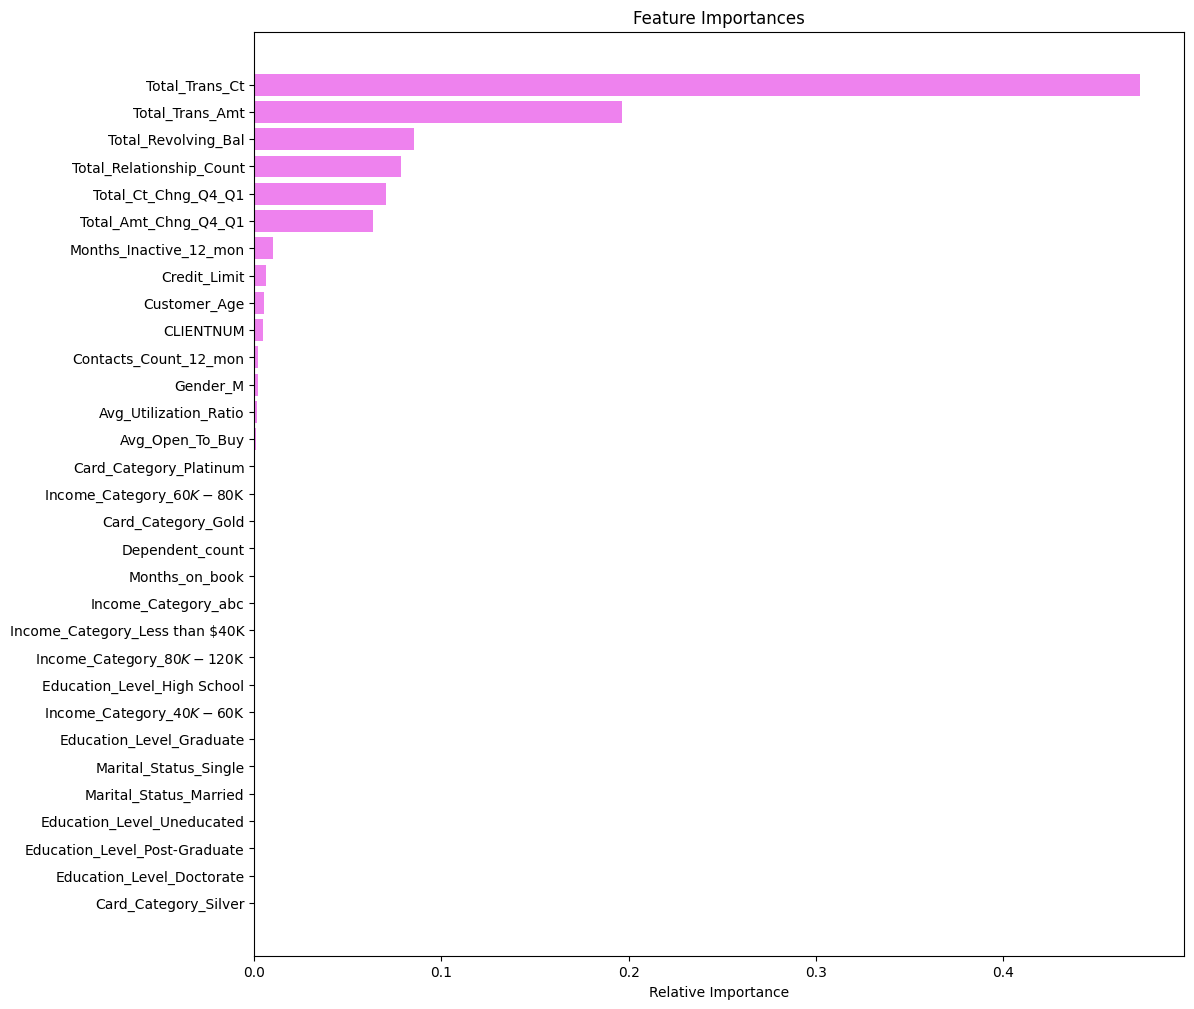

In [73]:
feature_names = X_train_un.columns
importances = tuned_adb_un.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Below Features seems to be the most important features to focus

* Total_Trans_Amt - Total Transaction Amount (Last 12 months)

* Total_Trans_Ct - Total Transaction Count (Last 12 months)

* Total_Revolving_Bal - Total Revolving Balance on the Credit Card

* Total_Amt_Chng_Q4_Q1 - Change in Transaction Amount (Q4 over Q1)

* Total_Ct_Chng_Q4_Q1 - Change in Transaction Count (Q4 over Q1)

* Contacts_Count_12_mon - No. of Contacts in the last 12 months

# Business Insights and Conclusions

**Business insights:**


* Customers with less Transcation amount are likely to Attrite from the credit card
* Customers who have goo transaction count in the credit card are likely to stay.
* Customers having good revolving balance with continue existing hence focus should be on customers who have low revolving balance.
* Factors that drive the attrition - Total_Trans_Ct, Total_Revolving_Bal, Total_Trans_Amt, Total_Relationship_Count
* Majority of bank clients are low income graduated indviaduals holding the blue card category.
* Customers who have lower Credit Limit may have more probability of attrition
* Attrition is highest among the customers who are using 1 or 2 products offered by the bank
* Less number of transactions can lead to less transaction amount and eventually leads to customer attrition


**Conclusion**

The model is also giving a strong preditcion on the existing customers, this can be utilized to explore closely the existing customers and the services they are satisfied with and enhancing them as a measure of strengthening the relationship and avoiding less to chrun in the future.



**Recommendations for the Bank:**

**Retention Programs:** Implement targeted customer retention programs, especially focused on those customers who exhibit signs of attrition. Offer personalized incentives, discounts, or loyalty rewards to encourage them to stay.

**Cross-Selling Opportunities:** Identify opportunities for cross-selling additional banking products or services to credit card customers. Bundling financial products can deepen customer relationships and increase retention.

**Feedback Mechanisms:** Establish effective feedback mechanisms to understand the reasons behind attrition. Conduct surveys or feedback sessions to gather insights into customer concerns and expectations. Use this information to make improvements.

**Digital Enhancements:** Invest in digital platforms and technologies to provide a seamless and convenient credit card experience. Mobile apps, online account management, and digital payment options can enhance customer satisfaction.

**Product Customization:** Offer customizable credit card solutions based on individual customer preferences and spending patterns. Tailoring products to match specific needs can increase customer satisfaction and loyalty.

**Risk Management Strategies:** Develop strategies to manage credit risk effectively, ensuring that credit limits and terms are aligned with customers' financial capabilities. This can minimize defaults and contribute to long-term customer relationships.

**Continuous Monitoring:** Implement a system for continuous monitoring of customer behavior, transaction patterns, and satisfaction levels. Timely intervention based on real-time data can prevent attrition.